### Classification Banking Marketing Deposit - End to End Machine Learning Projects
I got this Dataset Bank Marketing Analysis from Kaggle (https://www.kaggle.com/datasets/janiobachmann/bank-marketing-dataset)

Overall Steps:

* Import all Libraries & Load the Dataset
* Split Data (Train and test)
* Exploratory Data Analysis (EDA) categorical data and numrical data
* Removing redundant variable based on business value
* Data Preparation: Data Train
  * Drop duplicated data
  * Outliers analysis
  * Removing outliers
  * Missing value handling
* Data Preparation: Data Test
  * Drop duplicated data
  * Removing outliers
  * Missing value handling
* Split data into Xtrain, ytrain, Xtest, ytest
* Encoding preparation
* Encode separately for data train and data test
* Split Xtrain and Xtest into different categories
* Standar Scaller
* Modelling Classification ML algorithms:
  * Logistic Regression
  * K-Nearest Neighbor (KNN)
  * Naive Bayes
  * Support Vector Machine (SVM)

* Evaluation Model
  * Confusion Matrix Evaluation
  * Learning curve Regression
  * Learning curve K-Nearest Neighbor (KNN)
  * Learning curve Naive Bayes
  * Learning curve Support Vector Machine (SVM)


Thank You in Advance!

## Import Libraries

In [189]:
#import linear algebra and data manipulation libraries
import pandas as pd
import numpy as np

#import standard visualization
import matplotlib.pyplot as plt
import seaborn as sns

#import scipy statistical, standarscaller
import plotly.express as px
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler , LabelEncoder
from scipy import stats
from sklearn import preprocessing
import warnings
import random

#import ML Classification Libraries 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 

#import for split 
from sklearn.model_selection import train_test_split

#Evaluation
from sklearn.metrics import (roc_auc_score, roc_curve)
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,accuracy_score
#!pip install scikit-plot
#import scikitplot as skplt

In [198]:
import pkg_resources

def check_library_versions(libs):
    versions = {}
    for lib in libs:
        try:
            version = pkg_resources.get_distribution(lib).version
            versions[lib] = version
        except pkg_resources.DistributionNotFound:
            versions[lib] = 'Not Installed'
    return versions

# List of libraries
libraries = [
    'pandas',
    'numpy',
    'matplotlib',
    'seaborn',
    'plotly',
    'scipy',
    'scikit-learn',
]

# Get and print library versions
library_versions = check_library_versions(libraries)
for lib, version in library_versions.items():
    print(f"{lib}: {version}")


pandas: 1.5.3
numpy: 1.24.3
matplotlib: 3.7.1
seaborn: 0.12.2
plotly: 5.9.0
scipy: 1.10.1
scikit-learn: 1.3.0


# Attribute Information:

I got this Dataset Bank Marketing Analysis from Kaggle : (https://www.kaggle.com/datasets/janiobachmann/bank-marketing-dataset)

Input variables:
# bank client data:
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')
related with the last contact of the current campaign:
8. contact: contact communication type (categorical: 'cellular','telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
other attributes:
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success') social and economic context attributes
16. balance - client’s average yearly balance, in euros (numeric) 
17. Deposit - has the client subscribed a term deposit? (binary: 'yes','no')

## A. Data Understanding

In [6]:
df_bank = pd.read_csv("bank.csv")
df_bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [7]:
df_bank.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
866,37,management,married,tertiary,no,40,no,no,cellular,27,aug,1033,4,-1,0,unknown,yes
9019,31,management,married,tertiary,no,477,yes,no,cellular,21,nov,77,5,-1,0,unknown,no
7720,30,technician,single,tertiary,no,1,no,no,cellular,20,aug,88,2,-1,0,unknown,no
5888,31,services,married,secondary,no,395,no,no,cellular,25,jul,174,3,-1,0,unknown,no
10935,40,admin.,married,secondary,no,1395,yes,yes,cellular,7,jul,122,2,-1,0,unknown,no
2579,50,technician,married,secondary,no,3370,no,no,cellular,21,aug,531,2,80,2,success,yes
7625,33,technician,married,tertiary,no,-482,yes,no,cellular,29,jul,90,3,-1,0,unknown,no
3492,29,student,single,unknown,no,2929,no,no,cellular,5,may,232,1,89,4,other,yes
7311,42,services,married,secondary,no,1301,yes,no,cellular,21,jul,510,6,-1,0,unknown,no
4192,34,management,married,tertiary,no,1006,yes,no,cellular,19,nov,783,3,195,2,other,yes


In [8]:
df_bank["deposit"].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

In [9]:
5289/(5289+5873)
#almost balanced

0.4738398136534671

### Split Data (Train & Test)

In [10]:
#Copy data bank
X = df_bank.copy()
# Splitting to avoid data leakage (train : test = 80% : 20%)
train , test = train_test_split(X,train_size=0.8, random_state=42,stratify=X.deposit) #stratify to the target column 

In [11]:
train["deposit"].value_counts()

no     4698
yes    4231
Name: deposit, dtype: int64

In [12]:
#Calculate percentage "yes"
4231/(4231+4698)

0.47384925523574867

In [13]:
test["deposit"].value_counts()

no     1175
yes    1058
Name: deposit, dtype: int64

In [14]:
#Calculate percentage "yes"
1058/(1058+1175)

0.4738020600089566

In [15]:
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


### Exploratory Data Analysis (EDA)

#### Identify numerical and categorical data

In [16]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [17]:
df_bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

Based on the displayed result above
1. Categorical Data : the datatype of job, marital, education, default, housing, loan, contact, month, poutcome are object.

2. Numerical Data : Age, balance, day, duration, campaign, pdays, previous are int64, it means that they are numerical variables.

#### Heatmap Correlation
#### For case classification it is optional because you don't want to check VIF or multicollinearity (in regression)

C:\Users\acer\AppData\Local\Temp\ipykernel_22140\2380921244.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_bank.corr(),annot = True)


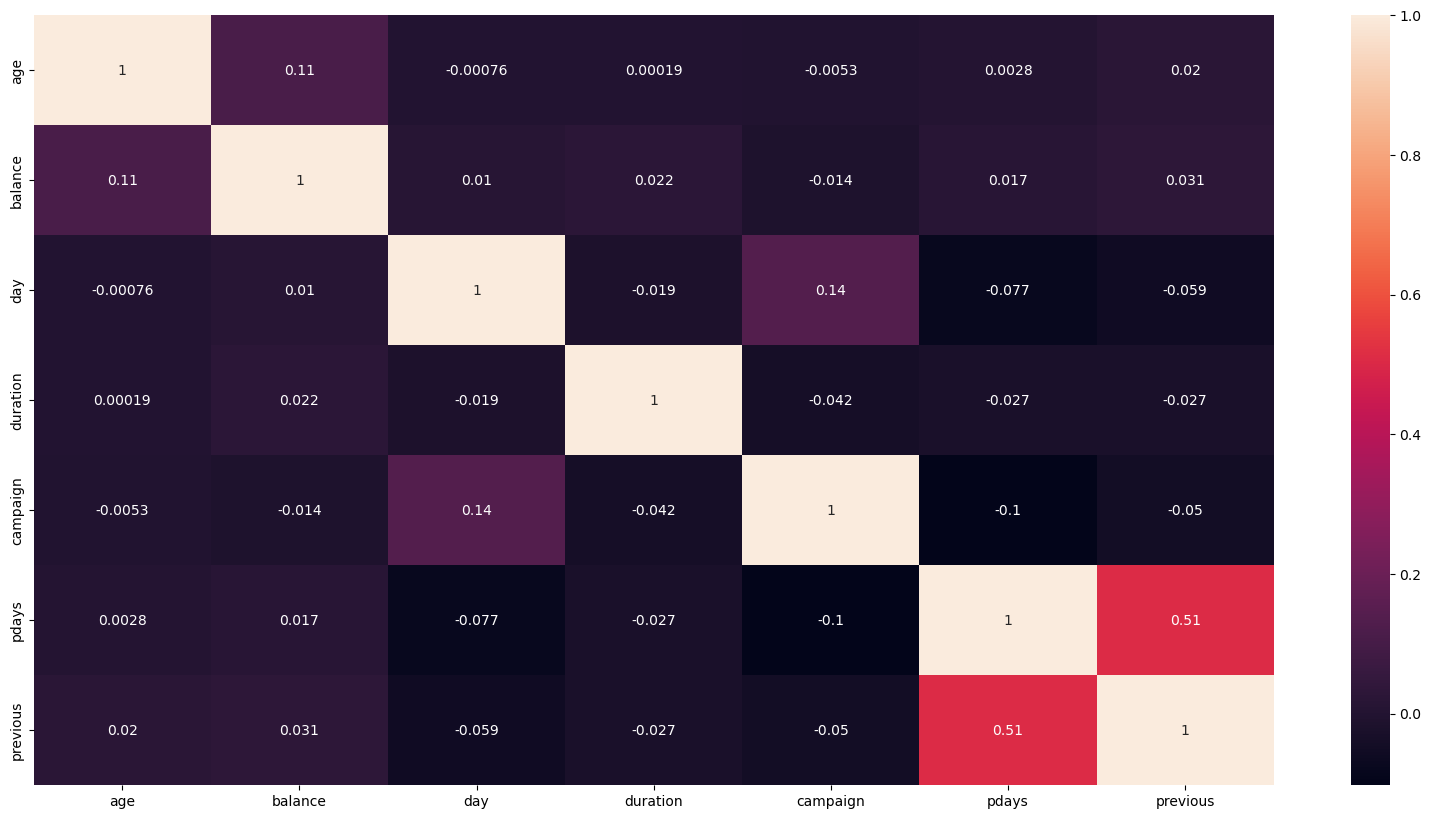

In [18]:
plt.figure(figsize=(20,10))
sns.heatmap(df_bank.corr(),annot = True)
plt.show()

#### Pearson Correlation Coefficient
From the graph above, it seems like nothing highly correlated as most of the values is below 0.5. 1 means is correlated while 0 means no correlation. There is no correlation, no relationship between the independent variables.So, it is good practice to check it before selecting the variables into the regression model since is one of the steps to avoid overfitting. Correlation matrix: (0<=|c|<0.3: weak), (0.3<=|c|<0.7: moderate) & (0.7<=|c|<1: strong). In classification it's must not.

### Exploratory Data Analysis : Categorical Data

In [19]:
def categorical_data(title):
    plt.figure(figsize=(17,8))
    
    # calculate proportion values for each category
    prop_df = df_bank.groupby([title, 'deposit']).size().reset_index(name='count')
    prop_df['prop'] = prop_df.groupby(title)['count'].apply(lambda x: x / x.sum())
    
    g=sns.catplot(x=title, y='prop', kind='bar', hue='deposit', palette='viridis', data=prop_df, height=8.27, aspect=11.7/8.27)
    #displays the value of each barplot
    ax = g.facet_axis(0,0)
    for p in ax.patches:
       ax.text(p.get_x() + p.get_width() / 2., 
            p.get_height(), 
            '{0:.2f}'.format(p.get_height()), 
            color='black', rotation='horizontal', size='large', ha='center')
    plt.show()


C:\Users\acer\AppData\Local\Temp\ipykernel_22140\3626474563.py:6: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  prop_df['prop'] = prop_df.groupby(title)['count'].apply(lambda x: x / x.sum())


<Figure size 1700x800 with 0 Axes>

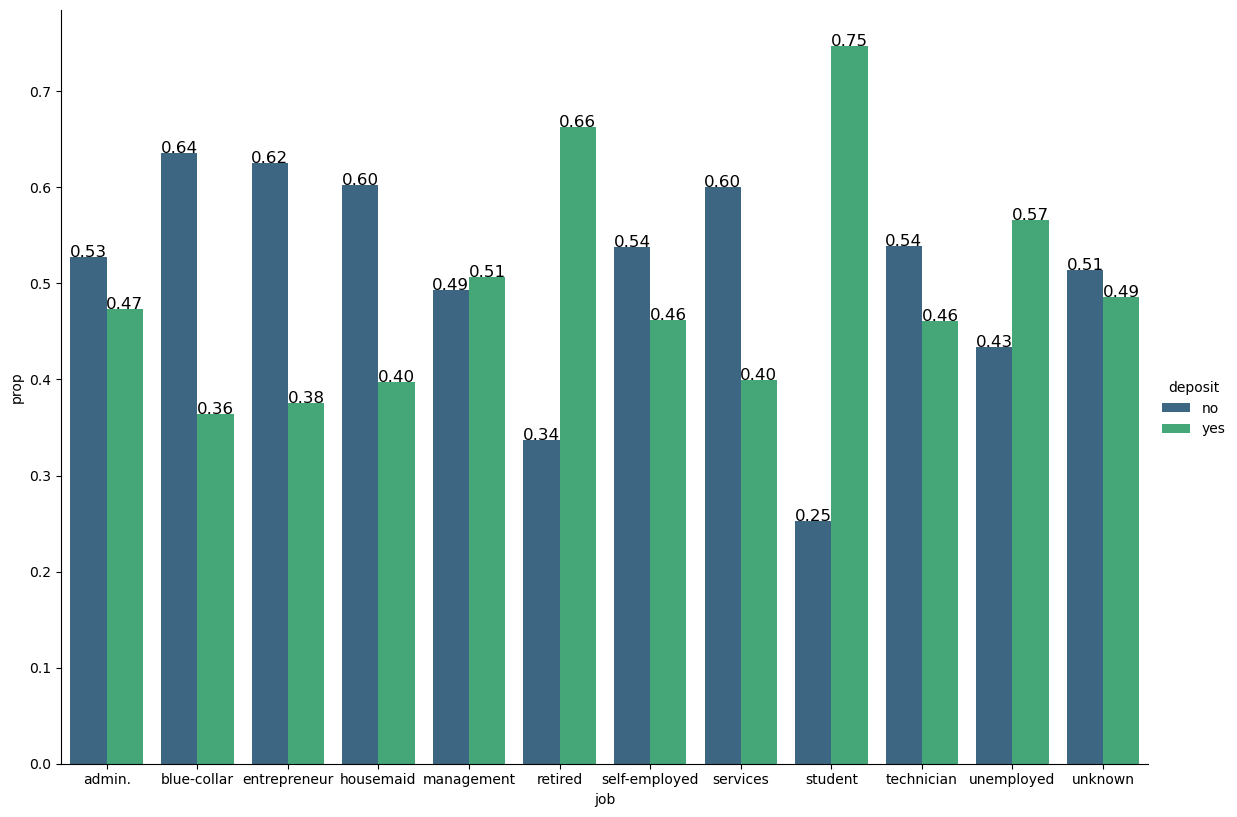

In [20]:
categorical_data("job")

C:\Users\acer\AppData\Local\Temp\ipykernel_22140\3626474563.py:6: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  prop_df['prop'] = prop_df.groupby(title)['count'].apply(lambda x: x / x.sum())


<Figure size 1700x800 with 0 Axes>

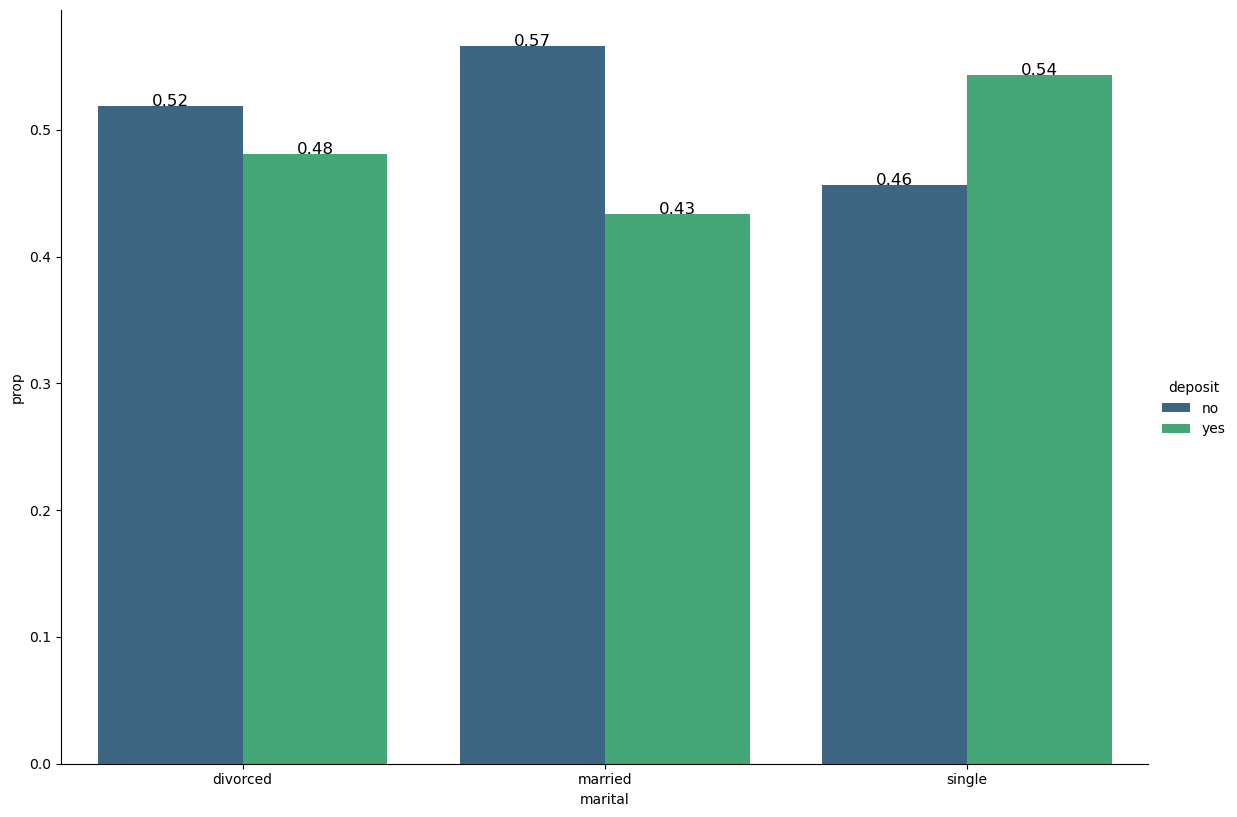

In [21]:
categorical_data("marital")

C:\Users\acer\AppData\Local\Temp\ipykernel_22140\3626474563.py:6: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  prop_df['prop'] = prop_df.groupby(title)['count'].apply(lambda x: x / x.sum())


<Figure size 1700x800 with 0 Axes>

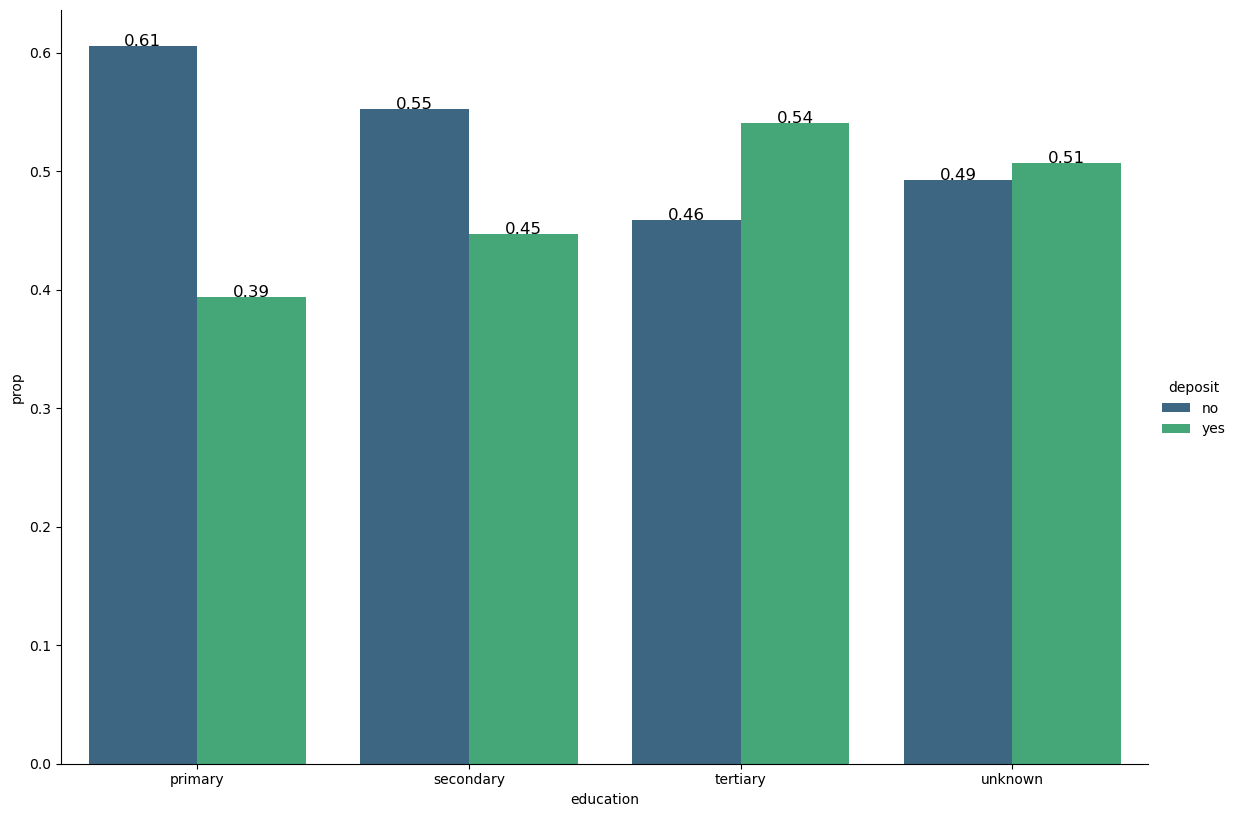

In [22]:
categorical_data("education")

C:\Users\acer\AppData\Local\Temp\ipykernel_22140\3626474563.py:6: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  prop_df['prop'] = prop_df.groupby(title)['count'].apply(lambda x: x / x.sum())


<Figure size 1700x800 with 0 Axes>

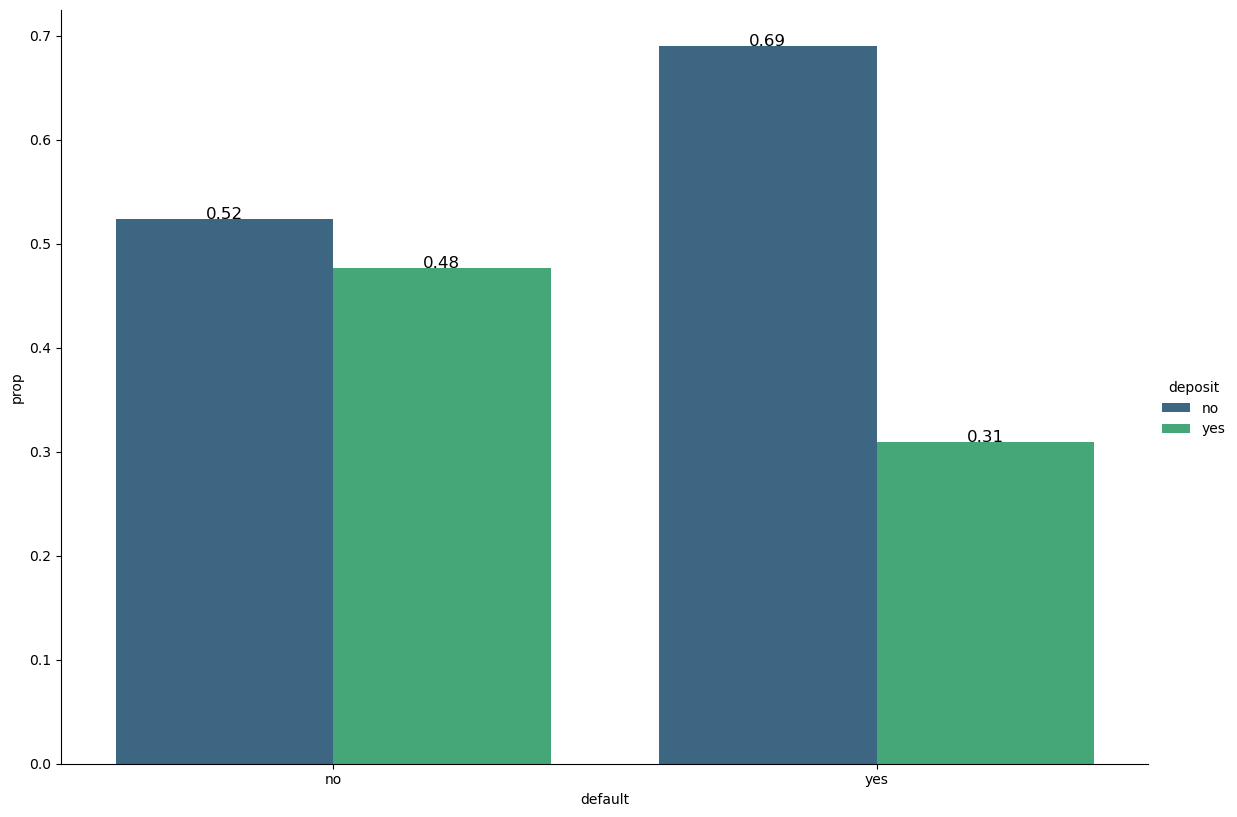

In [23]:
categorical_data("default")

C:\Users\acer\AppData\Local\Temp\ipykernel_22140\3626474563.py:6: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  prop_df['prop'] = prop_df.groupby(title)['count'].apply(lambda x: x / x.sum())


<Figure size 1700x800 with 0 Axes>

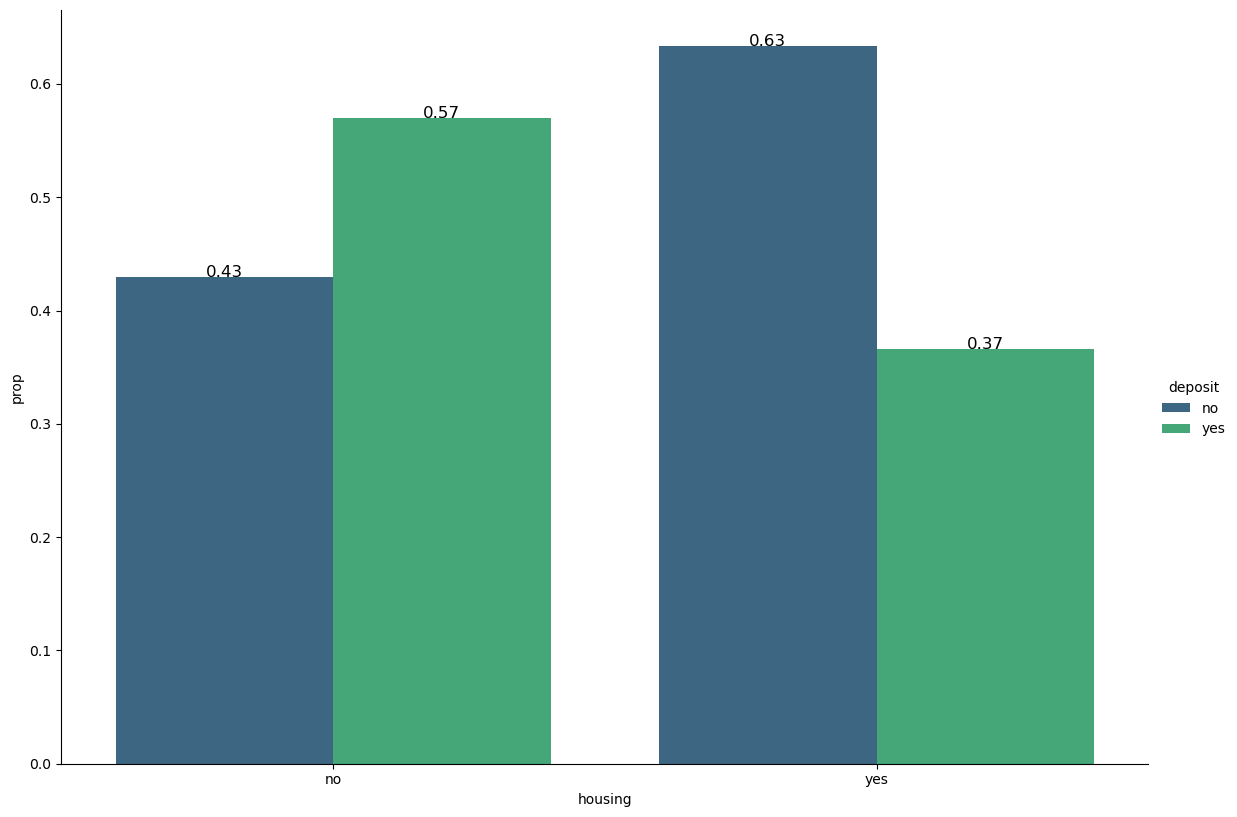

In [24]:
categorical_data("housing")

C:\Users\acer\AppData\Local\Temp\ipykernel_22140\3626474563.py:6: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  prop_df['prop'] = prop_df.groupby(title)['count'].apply(lambda x: x / x.sum())


<Figure size 1700x800 with 0 Axes>

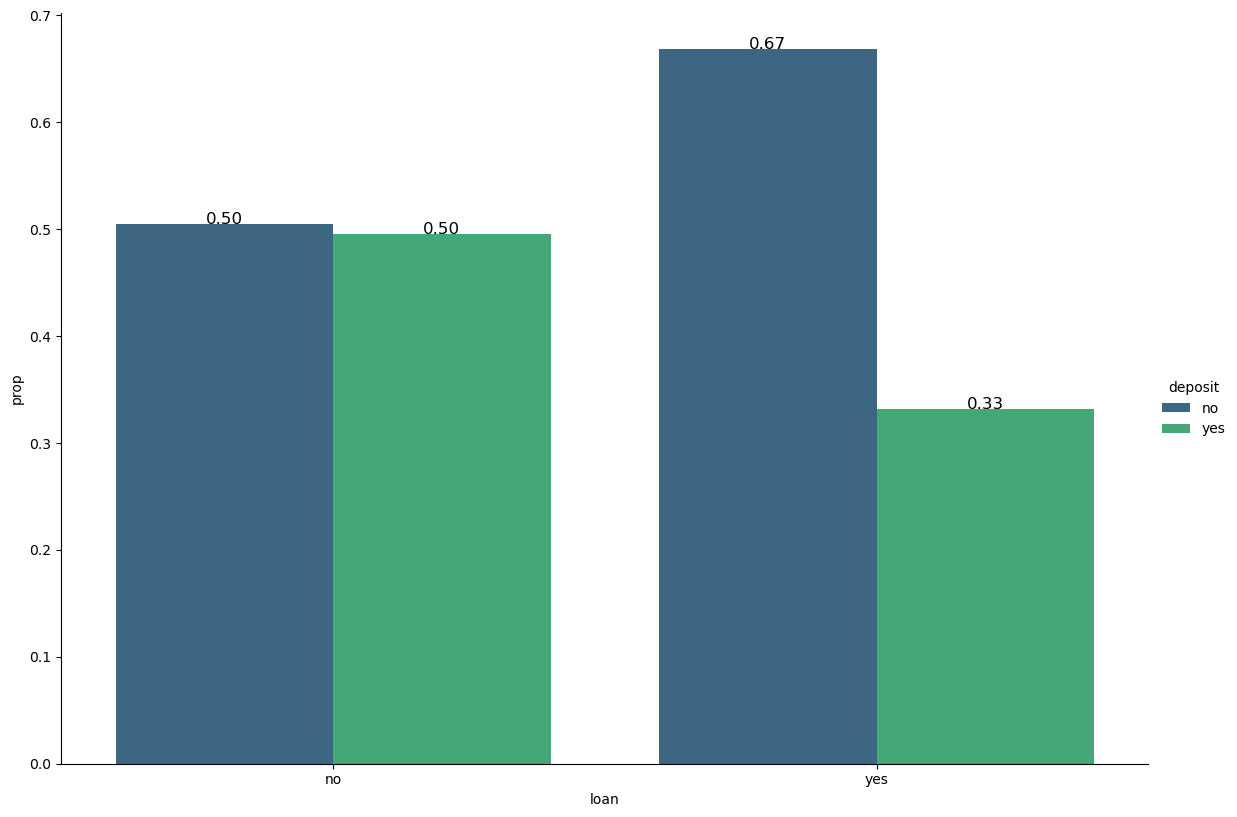

In [25]:
categorical_data("loan")

C:\Users\acer\AppData\Local\Temp\ipykernel_22140\3626474563.py:6: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  prop_df['prop'] = prop_df.groupby(title)['count'].apply(lambda x: x / x.sum())


<Figure size 1700x800 with 0 Axes>

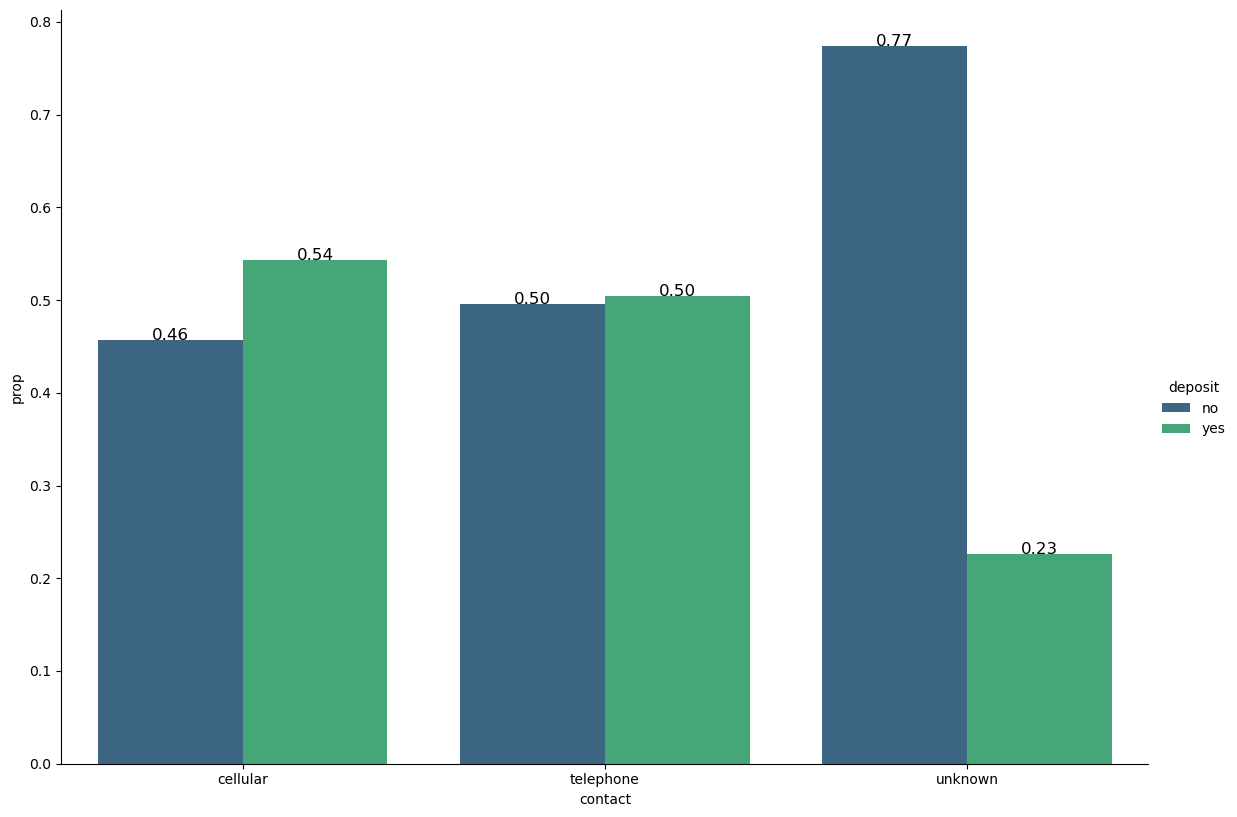

In [26]:
categorical_data("contact")

C:\Users\acer\AppData\Local\Temp\ipykernel_22140\3626474563.py:6: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  prop_df['prop'] = prop_df.groupby(title)['count'].apply(lambda x: x / x.sum())


<Figure size 1700x800 with 0 Axes>

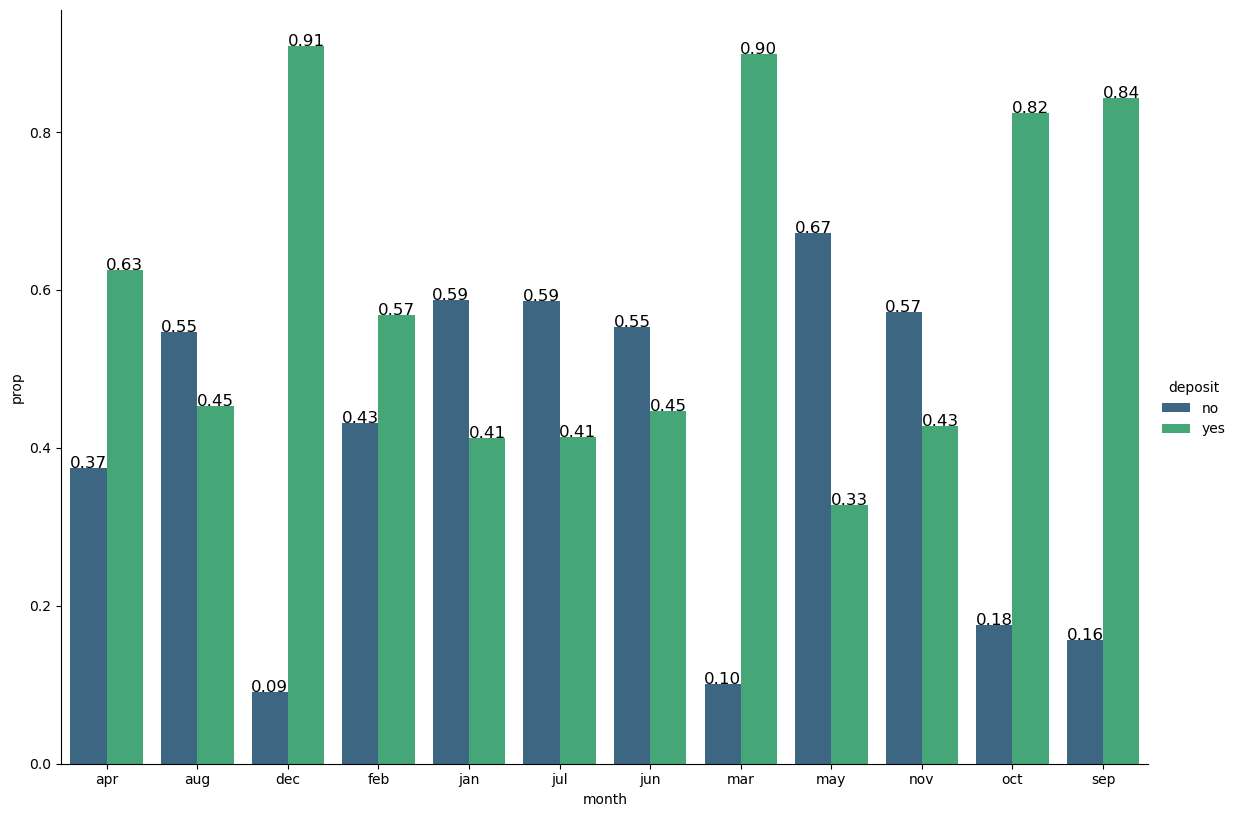

In [27]:
categorical_data("month")

C:\Users\acer\AppData\Local\Temp\ipykernel_22140\3626474563.py:6: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  prop_df['prop'] = prop_df.groupby(title)['count'].apply(lambda x: x / x.sum())


<Figure size 1700x800 with 0 Axes>

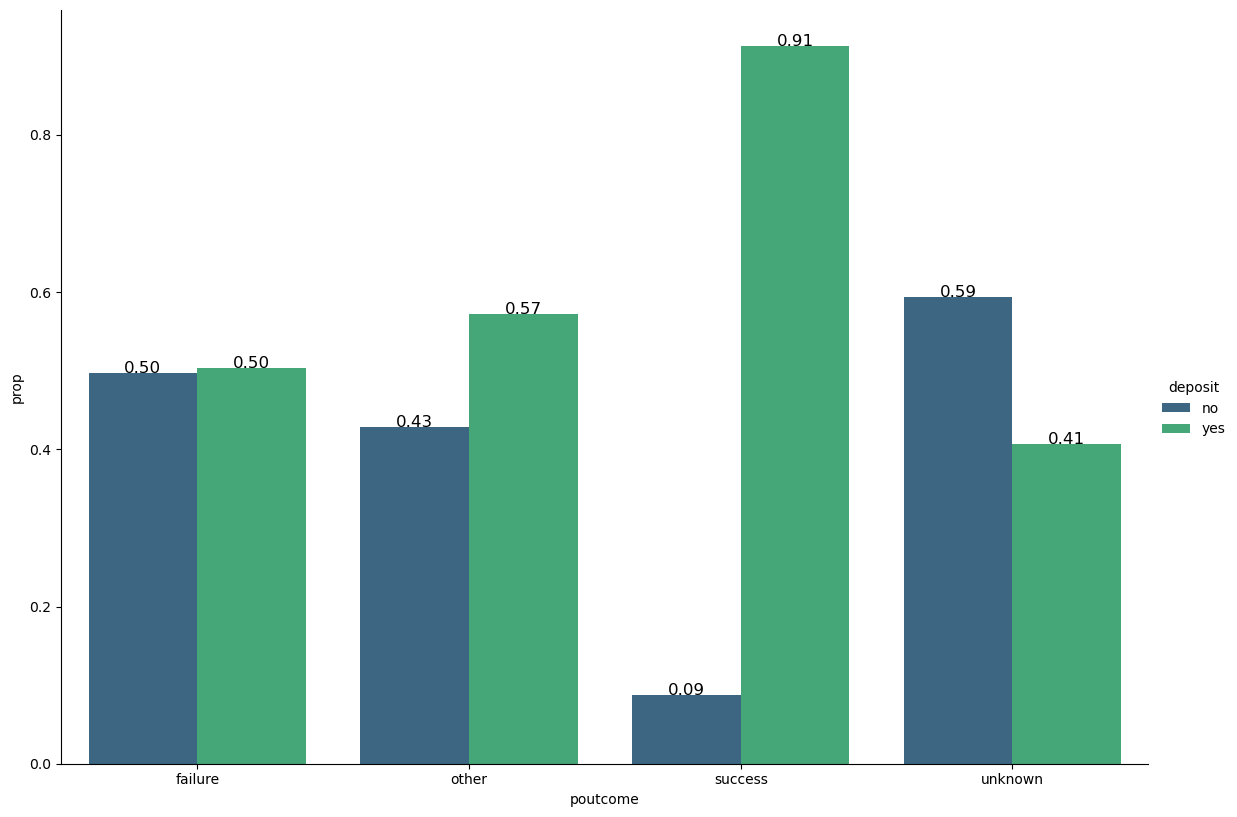

In [28]:
categorical_data("poutcome")

### Exploratory Data Analysis : Numerical Data

In [29]:
# desciptive analysis for numerical columns
df_bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [30]:
def dist_bivariate(title):
    sns.FacetGrid(df_bank,hue='deposit',palette='cubehelix').map(sns.distplot,title).add_legend()
    plt.show()

C:\Users\acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


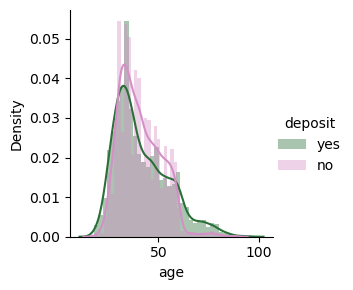

In [31]:
dist_bivariate('age')

C:\Users\acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


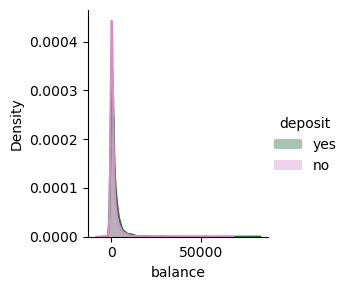

In [32]:
dist_bivariate('balance')

C:\Users\acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


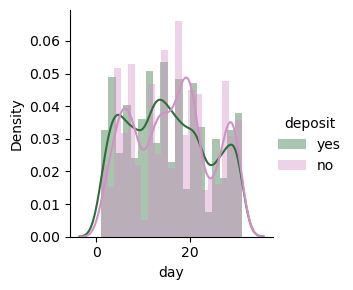

In [33]:
dist_bivariate("day")

C:\Users\acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


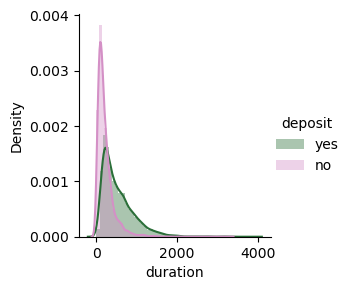

In [34]:
dist_bivariate("duration")

C:\Users\acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


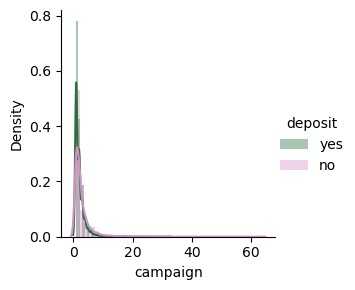

In [35]:
dist_bivariate('campaign')

C:\Users\acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


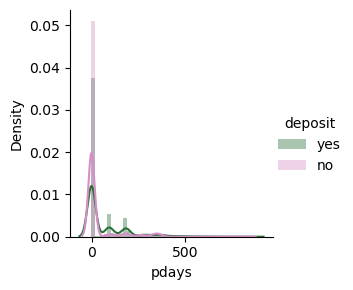

In [36]:
dist_bivariate('pdays')

C:\Users\acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


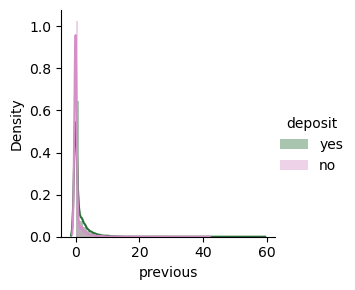

In [37]:
dist_bivariate("previous")

### Removing redundant variable based on business value
https://finansial.bisnis.com/read/20220730/90/1561069/bca-bbca-catat-ada-48000-nasabah-aktif-gunakan-layanan-sms-banking

About redundant variable:

https://medium.com/analytics-vidhya/feature-selection-extended-overview-b58f1d524c1c

https://medium.com/@data.science.enthusiast/feature-selection-techniques-forward-backward-wrapper-selection-9587f3c70cfa

In [38]:
#train
train = train[(train.age >= 17) & (train.age <= 90)]
train = train[train.day > 0]
train = train[train.duration >= 0]
train = train[train.pdays >= 0]
train = train[train.previous >= 0]

#test
test = test[(test.age >= 17) & (test.age <= 90)]
test = test[test.day > 0]
test = test[test.duration >= 0]
test = test[test.pdays >= 0]
test = test[test.previous >= 0]

## B. Data Preparation : Data Train (Data Pre-Processing)
1. Drop Duplicated Data
2. Outliers Analysis
3. Missing Value Handling
4. Encoding Preparation

In this part, data preparation do before modelling, so we treatment the train data. This is done on each data train and data test, so as to avoid data leakage.

About data leakage: 

https://abnormalsecurity.com/glossary/data-leak

https://medium.com/@gurupratap.matharu/data-leakage-in-machine-learning-390d560f0969

https://medium.com/geekculture/what-is-data-leakage-in-machine-learning-and-what-are-its-effects-811d58be7ccd

##### 1. Drop Duplicated Data

In [39]:
# Detect duplicate data
train[train.duplicated(keep=False)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit


In [40]:
print("Before drop duplicated data")
train.shape

Before drop duplicated data


(2284, 17)

In [41]:
train = train.drop_duplicates(keep='first')

In [42]:
print("After drop duplicated data")
train.shape

After drop duplicated data


(2284, 17)

In [43]:
#Check again for duplicated data
train[train.duplicated(keep=False)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit


There are not duplicated rows again after drop duplicated.

##### 2. Outliers Analysis

##### Removing Outliers
Using IQR because from numerical data, the distribution data is not normal distribution

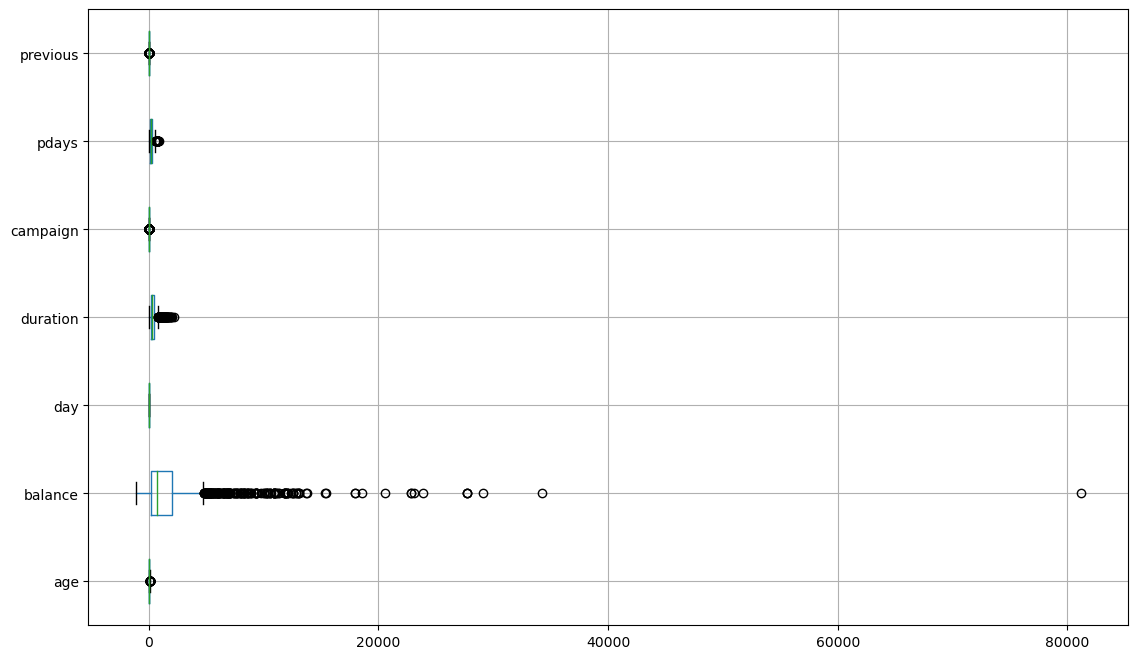

In [44]:
# Outlier Analysis

plt.figure(figsize=(16, 8))

# Create Boxplot
train.boxplot(vert=False)
plt.subplots_adjust(left=0.25)
plt.show()

###### remove outliers : previous column

In [45]:
train.shape

(2284, 17)

In [46]:
Q1 = train["previous"].quantile(0.25)
Q3 = train["previous"].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)

In [47]:
train = train[(train["previous"] >= low_limit) &
                        (train["previous"] <= high_limit)
                        ]

In [48]:
train.shape

(2160, 17)

###### remove outliers : pdays column

In [49]:
train.shape

(2160, 17)

In [50]:
Q1 = train["pdays"].quantile(0.25)
Q3 = train["pdays"].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)

In [51]:
train = train[(train["pdays"] >= low_limit) &
                        (train["pdays"] <= high_limit)
                        ]

In [52]:
train.shape

(2138, 17)

###### remove outliers : campaign column

In [53]:
train.shape

(2138, 17)

In [54]:
Q1 = train["campaign"].quantile(0.25)
Q3 = train["campaign"].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)

In [55]:
train = train[(train["campaign"] >= low_limit) &
                        (train["campaign"] <= high_limit)
                        ]

In [56]:
train.shape

(1944, 17)

###### remove outliers : duration column

In [57]:
train.shape

(1944, 17)

In [58]:
Q1 = train["duration"].quantile(0.25)
Q3 = train["duration"].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)

In [59]:
train = train[(train["duration"] >= low_limit) &
                        (train["duration"] <= high_limit)
                        ]

In [60]:
train.shape

(1818, 17)

###### remove outliers :  day column

In [61]:
train.shape

(1818, 17)

In [62]:
Q1 = train["day"].quantile(0.25)
Q3 = train["day"].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)

In [63]:
train = train[(train["day"] >= low_limit) &
                        (train["day"] <= high_limit)
                        ]

In [64]:
train.shape

(1818, 17)

###### remove outliers : balance column

In [65]:
train.shape

(1818, 17)

In [66]:
Q1 = train["balance"].quantile(0.25)
Q3 = train["balance"].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)

In [67]:
train = train[(train["balance"] >= low_limit) &
                        (train["balance"] <= high_limit)
                        ]

In [68]:
train.shape

(1674, 17)

###### remove outliers : age column

In [69]:
train.shape

(1674, 17)

In [70]:
Q1 = train["age"].quantile(0.25)
Q3 = train["age"].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)

In [71]:
train = train[(train["age"] >= low_limit) &
                        (train["age"] <= high_limit)
                        ]

In [72]:
train.shape

(1639, 17)

#### Now there are no outliers in train Data

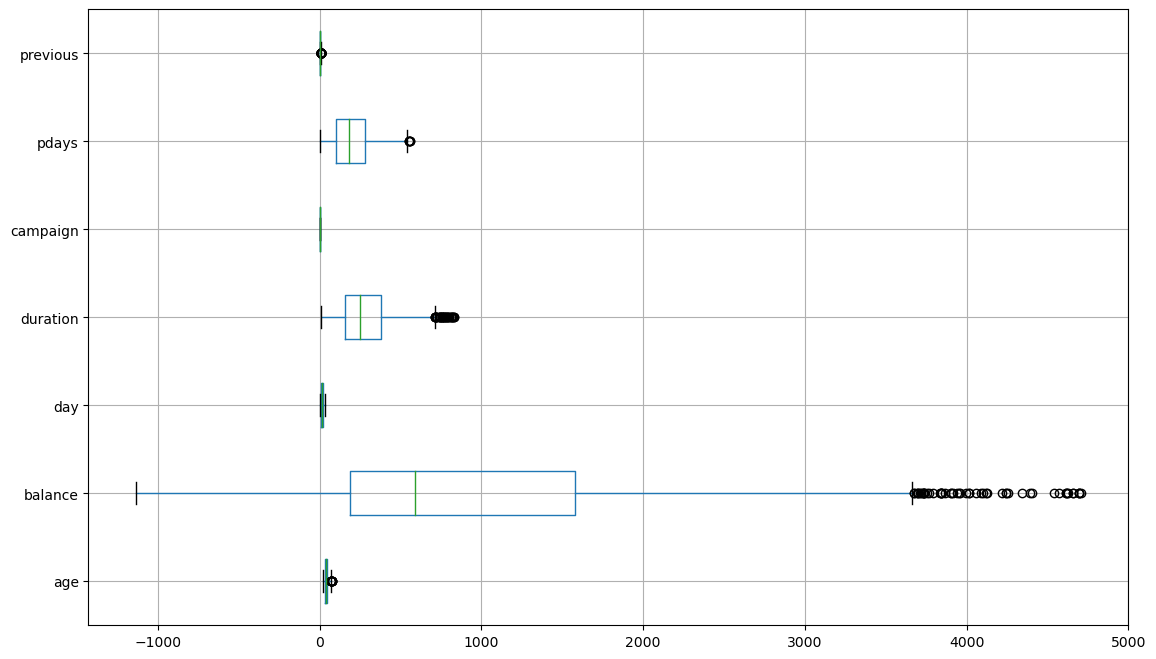

In [73]:
# Outlier Analysis checking again

plt.figure(figsize=(16, 8))

# Create Boxplot
train.boxplot(vert=False)
plt.subplots_adjust(left=0.25)
plt.show()

#### 3. Missing Value Handling

In [74]:
train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
2632,46,admin.,married,tertiary,no,2552,no,no,cellular,3,sep,260,1,94,8,success,yes
3056,25,technician,single,secondary,no,139,no,yes,cellular,11,jan,202,1,91,1,success,yes
1928,28,admin.,divorced,secondary,no,451,yes,no,cellular,13,may,302,1,301,1,success,yes
4095,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success,yes
7242,34,admin.,married,secondary,no,1467,yes,no,cellular,17,apr,113,1,332,2,failure,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4846,27,technician,single,tertiary,no,2781,yes,no,cellular,24,may,168,1,389,1,failure,yes
4804,30,admin.,single,secondary,no,3528,no,no,cellular,4,aug,250,1,92,2,failure,yes
1665,48,blue-collar,married,secondary,no,292,no,no,cellular,30,apr,271,1,79,1,success,yes
3752,27,admin.,married,tertiary,no,2855,no,no,cellular,22,jul,138,2,178,4,success,yes


In [75]:
train.sample(7)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
10303,50,self-employed,married,tertiary,no,202,yes,no,cellular,15,apr,107,1,148,4,failure,no
3103,48,admin.,divorced,secondary,no,1180,no,no,cellular,27,jan,142,1,238,3,other,yes
1715,34,management,single,tertiary,no,1228,no,no,cellular,30,apr,580,2,84,8,success,yes
6296,40,technician,married,secondary,no,372,yes,no,cellular,21,nov,365,1,100,2,failure,no
1947,50,technician,divorced,secondary,no,-54,yes,yes,cellular,13,may,698,2,292,1,failure,yes
6592,45,admin.,married,secondary,no,1214,yes,no,cellular,2,feb,150,2,189,2,failure,no
2094,37,services,married,secondary,no,1543,yes,no,cellular,22,may,298,1,10,6,failure,yes


##### Missing Value Check each rows

In [76]:
train['n_missing'] = train.isnull().sum(axis=1)

In [77]:
train.sort_values('n_missing',ascending=False)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,n_missing
2632,46,admin.,married,tertiary,no,2552,no,no,cellular,3,sep,260,1,94,8,success,yes,0
1746,29,blue-collar,single,secondary,no,734,yes,yes,cellular,30,apr,259,1,296,1,other,yes,0
6624,58,services,married,secondary,no,-37,no,yes,telephone,6,feb,150,2,205,6,failure,no,0
10696,29,technician,single,tertiary,no,940,yes,no,cellular,15,may,757,1,330,1,failure,no,0
4698,30,management,married,tertiary,no,1942,yes,yes,cellular,21,nov,436,2,178,3,other,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4434,33,management,married,tertiary,no,271,yes,no,cellular,13,nov,182,2,91,2,success,yes,0
10652,35,technician,married,secondary,no,128,no,yes,cellular,29,jan,456,1,205,2,other,no,0
2642,30,admin.,single,secondary,no,2568,no,no,cellular,4,sep,563,1,100,4,other,yes,0
2763,57,management,married,tertiary,no,1318,no,no,cellular,16,oct,115,1,185,2,failure,yes,0


In [78]:
train.drop('n_missing', axis=1, inplace=True)

In [79]:
train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
2632,46,admin.,married,tertiary,no,2552,no,no,cellular,3,sep,260,1,94,8,success,yes
3056,25,technician,single,secondary,no,139,no,yes,cellular,11,jan,202,1,91,1,success,yes
1928,28,admin.,divorced,secondary,no,451,yes,no,cellular,13,may,302,1,301,1,success,yes
4095,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success,yes
7242,34,admin.,married,secondary,no,1467,yes,no,cellular,17,apr,113,1,332,2,failure,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4846,27,technician,single,tertiary,no,2781,yes,no,cellular,24,may,168,1,389,1,failure,yes
4804,30,admin.,single,secondary,no,3528,no,no,cellular,4,aug,250,1,92,2,failure,yes
1665,48,blue-collar,married,secondary,no,292,no,no,cellular,30,apr,271,1,79,1,success,yes
3752,27,admin.,married,tertiary,no,2855,no,no,cellular,22,jul,138,2,178,4,success,yes


##### Missing Value check each columns

In [80]:
train.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [81]:
train.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

##### Missing value check NaN

In [82]:
train.isnull().sum().sum()

0

In [83]:
train.isnull().any().any()

False

In [84]:
count_nan = train.isnull().sum()
print ('Count of NaN: ' + str(count_nan))

Count of NaN: age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


In [85]:
for column in train.columns:
    print(f"============= {column} =================")
    display(train[column].value_counts())
    print()

============= age =================


34    91
33    84
31    67
32    66
30    65
37    63
35    62
36    62
29    59
38    51
28    51
39    46
40    46
44    43
47    41
43    40
27    38
55    36
48    34
46    33
42    32
41    32
45    30
26    29
56    29
60    26
54    25
51    25
52    25
49    24
57    22
59    21
50    21
53    20
61    18
24    18
58    17
25    17
62    15
23    15
22    12
63    10
68     8
64     7
73     7
72     7
66     7
21     5
69     5
74     5
71     5
65     5
20     5
19     4
67     4
70     3
18     1
Name: age, dtype: int64


============= job =================


management       402
technician       284
admin.           247
blue-collar      222
services         117
retired          105
student           85
unemployed        55
self-employed     53
entrepreneur      34
housemaid         27
unknown            8
Name: job, dtype: int64


============= marital =================


married     898
single      582
divorced    159
Name: marital, dtype: int64


============= education =================


secondary    816
tertiary     615
primary      132
unknown       76
Name: education, dtype: int64


============= default =================


no     1629
yes      10
Name: default, dtype: int64


============= balance =================


 0       103
 2557      7
 1         6
 1646      6
 215       5
        ... 
 691       1
-55        1
 641       1
 146       1
 3528      1
Name: balance, Length: 1013, dtype: int64


============= housing =================


no     908
yes    731
Name: housing, dtype: int64


============= loan =================


no     1475
yes     164
Name: loan, dtype: int64


============= contact =================


cellular     1536
telephone      93
unknown        10
Name: contact, dtype: int64


============= day =================


12    93
13    81
15    80
4     78
11    78
18    76
2     73
5     66
30    63
3     62
6     61
14    61
17    60
7     58
9     57
8     56
16    54
20    49
21    49
29    44
22    43
19    41
25    41
28    38
10    36
27    36
26    33
1     26
23    21
24    15
31    10
Name: day, dtype: int64


============= month =================


may    354
nov    187
apr    182
aug    180
feb    162
oct    125
jun    104
sep     97
jul     82
jan     69
mar     63
dec     34
Name: month, dtype: int64


============= duration =================


134    11
226    10
182    10
265    10
261     9
       ..
638     1
725     1
412     1
10      1
510     1
Name: duration, Length: 597, dtype: int64


============= campaign =================


1    949
2    494
3    196
Name: campaign, dtype: int64


============= pdays =================


92     59
182    50
91     48
183    48
181    46
       ..
118     1
27      1
239     1
475     1
198     1
Name: pdays, Length: 370, dtype: int64


============= previous =================


1    573
2    428
3    267
4    146
5     93
6     61
8     38
7     33
Name: previous, dtype: int64


============= poutcome =================


failure    707
success    655
other      276
unknown      1
Name: poutcome, dtype: int64


============= deposit =================


yes    1084
no      555
Name: deposit, dtype: int64

From the result code above, we saw that there are also missing value in several columns. Below is the list of all missing value for each column :
- Job: unknown
- Education: unknown
- Contact: unknown
- poutcome : unknown

balance: average yearly balance, if the value is negative because banks charge fees when this happens. And your bank could close your account if it stays negative for too long.
pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

Now we know what are the missing values contained in each of the columns. Next, we have to decide how should we act on those columns that have missing values. Should we drop that column? Or should we impute the missing value?

First, we have to see what's the percentage of missing value in that column. **If it contained a lot of missing value (let say >35%), then we can just drop that column**. If not, then we can do some imputation.

##### Check percentage of missing value in each column selection

In [86]:
100 * len(train[train['job'].isin(['unknown'])]) / len(train)

0.4881025015253203

In [87]:
100 * len(train[train['education'].isin(['unknown'])]) / len(train)

4.636973764490543

In [88]:
100 * len(train[train['contact'].isin(['unknown'])]) / len(train)

0.6101281269066504

In [89]:
100 * len(train[train['poutcome'].isin(['unknown'])]) / len(train)

0.06101281269066504

##### imputation data for : job, education, contact columns

In [90]:
# Mode imputation on job column

mode_job = train[~train['job'].isin(['unknown'])]['job'].mode()[0]

train['job'] = train['job'].apply(lambda x: mode_job if x in ['unknown'] else x)

In [91]:
mode_job

'management'

In [92]:
train['job'].value_counts()

management       410
technician       284
admin.           247
blue-collar      222
services         117
retired          105
student           85
unemployed        55
self-employed     53
entrepreneur      34
housemaid         27
Name: job, dtype: int64

In [93]:
# Mode imputation on education column

mode_education = train[~train['education'].isin(['unknown'])]['education'].mode()[0]

train['education'] = train['education'].apply(lambda x: mode_education if x in ['unknown'] else x)

In [94]:
mode_education

'secondary'

In [95]:
train['education'].value_counts()

secondary    892
tertiary     615
primary      132
Name: education, dtype: int64

In [96]:
# Mode imputation on contact column

mode_contact = train[~train['contact'].isin(['unknown'])]['contact'].mode()[0]

train['contact'] = train['contact'].apply(lambda x: mode_contact if x in ['unknown'] else x)

In [97]:
mode_contact

'cellular'

In [98]:
train['contact'].value_counts()

cellular     1546
telephone      93
Name: contact, dtype: int64

In [99]:
# Mode imputation on poutcome column

mode_poutcome = train[~train['poutcome'].isin(['unknown'])]['poutcome'].mode()[0]

train['poutcome'] = train['poutcome'].apply(lambda x: mode_poutcome if x in ['unknown'] else x)

In [100]:
mode_poutcome

'failure'

In [101]:
train['poutcome'].value_counts()

failure    708
success    655
other      276
Name: poutcome, dtype: int64

#### Check again for each columns

In [102]:
for column in train.columns:
    print(f"============= {column} =================")
    display(train[column].value_counts())
    print()

============= age =================


34    91
33    84
31    67
32    66
30    65
37    63
35    62
36    62
29    59
38    51
28    51
39    46
40    46
44    43
47    41
43    40
27    38
55    36
48    34
46    33
42    32
41    32
45    30
26    29
56    29
60    26
54    25
51    25
52    25
49    24
57    22
59    21
50    21
53    20
61    18
24    18
58    17
25    17
62    15
23    15
22    12
63    10
68     8
64     7
73     7
72     7
66     7
21     5
69     5
74     5
71     5
65     5
20     5
19     4
67     4
70     3
18     1
Name: age, dtype: int64


============= job =================


management       410
technician       284
admin.           247
blue-collar      222
services         117
retired          105
student           85
unemployed        55
self-employed     53
entrepreneur      34
housemaid         27
Name: job, dtype: int64


============= marital =================


married     898
single      582
divorced    159
Name: marital, dtype: int64


============= education =================


secondary    892
tertiary     615
primary      132
Name: education, dtype: int64


============= default =================


no     1629
yes      10
Name: default, dtype: int64


============= balance =================


 0       103
 2557      7
 1         6
 1646      6
 215       5
        ... 
 691       1
-55        1
 641       1
 146       1
 3528      1
Name: balance, Length: 1013, dtype: int64


============= housing =================


no     908
yes    731
Name: housing, dtype: int64


============= loan =================


no     1475
yes     164
Name: loan, dtype: int64


============= contact =================


cellular     1546
telephone      93
Name: contact, dtype: int64


============= day =================


12    93
13    81
15    80
4     78
11    78
18    76
2     73
5     66
30    63
3     62
6     61
14    61
17    60
7     58
9     57
8     56
16    54
20    49
21    49
29    44
22    43
19    41
25    41
28    38
10    36
27    36
26    33
1     26
23    21
24    15
31    10
Name: day, dtype: int64


============= month =================


may    354
nov    187
apr    182
aug    180
feb    162
oct    125
jun    104
sep     97
jul     82
jan     69
mar     63
dec     34
Name: month, dtype: int64


============= duration =================


134    11
226    10
182    10
265    10
261     9
       ..
638     1
725     1
412     1
10      1
510     1
Name: duration, Length: 597, dtype: int64


============= campaign =================


1    949
2    494
3    196
Name: campaign, dtype: int64


============= pdays =================


92     59
182    50
91     48
183    48
181    46
       ..
118     1
27      1
239     1
475     1
198     1
Name: pdays, Length: 370, dtype: int64


============= previous =================


1    573
2    428
3    267
4    146
5     93
6     61
8     38
7     33
Name: previous, dtype: int64


============= poutcome =================


failure    708
success    655
other      276
Name: poutcome, dtype: int64


============= deposit =================


yes    1084
no      555
Name: deposit, dtype: int64

In [103]:
train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
2632,46,admin.,married,tertiary,no,2552,no,no,cellular,3,sep,260,1,94,8,success,yes
3056,25,technician,single,secondary,no,139,no,yes,cellular,11,jan,202,1,91,1,success,yes
1928,28,admin.,divorced,secondary,no,451,yes,no,cellular,13,may,302,1,301,1,success,yes
4095,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success,yes
7242,34,admin.,married,secondary,no,1467,yes,no,cellular,17,apr,113,1,332,2,failure,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4846,27,technician,single,tertiary,no,2781,yes,no,cellular,24,may,168,1,389,1,failure,yes
4804,30,admin.,single,secondary,no,3528,no,no,cellular,4,aug,250,1,92,2,failure,yes
1665,48,blue-collar,married,secondary,no,292,no,no,cellular,30,apr,271,1,79,1,success,yes
3752,27,admin.,married,tertiary,no,2855,no,no,cellular,22,jul,138,2,178,4,success,yes


After we doing the missing value handling and imputation, we do the imputation and drop poutcome in data test, we inject the information from imputation data train to data test. `we do it for the predict in data test after modelling.` Do the same for data preparation modelling in data test but when imputate it reference to treatment in data train.

## C. Data Preparation : Data Test
1. Drop Duplicated Data
2. Missing Value Handling
3. Encoding Preparation

In this part, data preparation do before modelling, so we treatment the train data

##### 1. Drop Duplicated Data

In [104]:
test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
7949,52,admin.,married,secondary,no,722,no,no,cellular,26,oct,99,2,185,3,failure,no
1532,34,management,married,secondary,yes,879,yes,no,cellular,17,apr,712,1,344,1,failure,yes
4016,61,retired,married,secondary,no,11,no,no,cellular,29,sep,232,1,92,3,success,yes
1024,38,entrepreneur,married,tertiary,no,1110,yes,no,cellular,20,nov,888,2,183,2,failure,yes
7154,33,technician,single,secondary,no,3499,yes,no,cellular,11,may,143,3,356,1,other,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9860,42,management,married,tertiary,no,72,yes,no,cellular,20,apr,124,2,348,3,failure,no
3380,84,retired,married,secondary,no,81204,no,no,telephone,1,apr,390,1,94,3,success,yes
8733,43,self-employed,married,tertiary,no,3157,no,no,cellular,21,apr,381,2,330,17,other,no
3598,31,management,single,tertiary,no,147,no,no,cellular,9,jun,163,2,92,3,success,yes


In [105]:
# Detect duplicate data
test[test.duplicated(keep=False)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit


In [106]:
print("Before drop duplicated data test")
test.shape

Before drop duplicated data test


(551, 17)

In [107]:
test = test.drop_duplicates(keep='first')

In [108]:
print("After drop duplicated data test")
test.shape

After drop duplicated data test


(551, 17)

In [109]:
#Check again for duplicated data
test[test.duplicated(keep=False)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit


#### 2. Missing Value Handling

In [110]:
test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
7949,52,admin.,married,secondary,no,722,no,no,cellular,26,oct,99,2,185,3,failure,no
1532,34,management,married,secondary,yes,879,yes,no,cellular,17,apr,712,1,344,1,failure,yes
4016,61,retired,married,secondary,no,11,no,no,cellular,29,sep,232,1,92,3,success,yes
1024,38,entrepreneur,married,tertiary,no,1110,yes,no,cellular,20,nov,888,2,183,2,failure,yes
7154,33,technician,single,secondary,no,3499,yes,no,cellular,11,may,143,3,356,1,other,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9860,42,management,married,tertiary,no,72,yes,no,cellular,20,apr,124,2,348,3,failure,no
3380,84,retired,married,secondary,no,81204,no,no,telephone,1,apr,390,1,94,3,success,yes
8733,43,self-employed,married,tertiary,no,3157,no,no,cellular,21,apr,381,2,330,17,other,no
3598,31,management,single,tertiary,no,147,no,no,cellular,9,jun,163,2,92,3,success,yes


##### Missing Value Check each rows

In [111]:
test['n_missing'] = test.isnull().sum(axis=1)
test.sort_values('n_missing',ascending=False)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,n_missing
7949,52,admin.,married,secondary,no,722,no,no,cellular,26,oct,99,2,185,3,failure,no,0
2640,26,technician,single,secondary,no,1231,yes,no,cellular,4,sep,230,1,93,7,success,yes,0
3556,30,admin.,single,secondary,no,265,yes,no,cellular,25,may,681,1,181,2,success,yes,0
8430,54,technician,married,secondary,no,0,no,no,telephone,16,nov,986,1,94,8,failure,no,0
9080,33,services,married,secondary,no,387,yes,no,cellular,7,apr,327,2,138,2,failure,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2878,36,management,single,tertiary,no,62,yes,no,cellular,3,nov,566,1,182,7,failure,yes,0
1449,28,management,divorced,tertiary,no,229,yes,no,cellular,9,apr,1042,2,315,2,other,yes,0
6652,50,housemaid,married,secondary,no,388,no,no,cellular,8,jun,152,2,89,2,success,no,0
1677,30,management,single,tertiary,no,398,no,no,cellular,30,apr,554,1,6,2,success,yes,0


In [112]:
test.drop('n_missing', axis=1, inplace=True)
test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
7949,52,admin.,married,secondary,no,722,no,no,cellular,26,oct,99,2,185,3,failure,no
1532,34,management,married,secondary,yes,879,yes,no,cellular,17,apr,712,1,344,1,failure,yes
4016,61,retired,married,secondary,no,11,no,no,cellular,29,sep,232,1,92,3,success,yes
1024,38,entrepreneur,married,tertiary,no,1110,yes,no,cellular,20,nov,888,2,183,2,failure,yes
7154,33,technician,single,secondary,no,3499,yes,no,cellular,11,may,143,3,356,1,other,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9860,42,management,married,tertiary,no,72,yes,no,cellular,20,apr,124,2,348,3,failure,no
3380,84,retired,married,secondary,no,81204,no,no,telephone,1,apr,390,1,94,3,success,yes
8733,43,self-employed,married,tertiary,no,3157,no,no,cellular,21,apr,381,2,330,17,other,no
3598,31,management,single,tertiary,no,147,no,no,cellular,9,jun,163,2,92,3,success,yes


##### Missing Value check each columns

In [113]:
test.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [114]:
test.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [115]:
count_nan_in_test = test.isnull().sum().sum()
print ('Count of NaN: ' + str(count_nan_in_test))

Count of NaN: 0


In [116]:
check_nan_in_test = test.isnull().values.any()
print (check_nan_in_test)

False


In [117]:
for column in test.columns:
    print(f"============= {column} =================")
    display(test[column].value_counts())
    print()

============= age =================


36    29
33    27
37    27
35    25
34    22
      ..
18     1
66     1
19     1
78     1
84     1
Name: age, Length: 61, dtype: int64


============= job =================


management       143
technician        78
blue-collar       77
admin.            64
retired           56
services          45
unemployed        21
student           20
self-employed     19
housemaid         12
entrepreneur      11
unknown            5
Name: job, dtype: int64


============= marital =================


married     330
single      171
divorced     50
Name: marital, dtype: int64


============= education =================


secondary    272
tertiary     202
primary       55
unknown       22
Name: education, dtype: int64


============= default =================


no     550
yes      1
Name: default, dtype: int64


============= balance =================


0       31
294      3
255      3
96       3
2557     3
        ..
6843     1
115      1
2155     1
4126     1
85       1
Name: balance, Length: 461, dtype: int64


============= housing =================


no     295
yes    256
Name: housing, dtype: int64


============= loan =================


no     494
yes     57
Name: loan, dtype: int64


============= contact =================


cellular     509
telephone     37
unknown        5
Name: contact, dtype: int64


============= day =================


13    38
15    33
4     31
30    24
12    23
8     22
6     22
9     21
5     21
11    21
17    20
29    19
18    18
21    18
3     18
14    17
16    17
20    16
10    16
2     15
7     15
22    15
26    13
28    13
27    13
25    12
19    11
1     11
24     8
23     8
31     2
Name: day, dtype: int64


============= month =================


may    104
apr     75
feb     64
nov     63
aug     47
sep     42
jul     37
oct     35
jun     31
jan     24
mar     19
dec     10
Name: month, dtype: int64


============= duration =================


99     4
232    4
166    4
158    4
187    4
      ..
252    1
455    1
806    1
873    1
590    1
Name: duration, Length: 378, dtype: int64


============= campaign =================


1     284
2     156
3      53
4      28
5      15
6       6
8       5
9       2
12      1
7       1
Name: campaign, dtype: int64


============= pdays =================


92     24
181    20
182    19
91     17
183    13
       ..
384     1
230     1
253     1
594     1
348     1
Name: pdays, Length: 245, dtype: int64


============= previous =================


1     158
2     134
3      75
5      49
4      44
6      25
7      18
8      13
10      8
9       6
11      6
13      4
12      2
23      2
15      2
14      2
19      1
16      1
17      1
Name: previous, dtype: int64


============= poutcome =================


failure    236
success    208
other      106
unknown      1
Name: poutcome, dtype: int64


============= deposit =================


yes    373
no     178
Name: deposit, dtype: int64

From the result code above, we saw that there are also missing value in several columns. Below is the list of all missing value for each column :

- Job: unknown
- Education: unknown
- Contact: unknown

Because of poutcome column has been dropped.
balance: average yearly balance, if the value is negative because banks charge fees when this happens. And your bank could close your account if it stays negative for too long. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

Now we know what are the missing values contained in each of the columns. Next, we have to decide how should we act on those columns that have missing values. Should we drop that column? Or should we impute the missing value?

First, we have to see what's the percentage of missing value in that column. If it contained a lot of missing value (let say >35%), then we can just drop that column. If not, then we can do some imputation.

#### Check percentage of missing value in each column selection

In [118]:
100 * len(test[test['job'].isin(['unknown'])]) / len(test)

0.9074410163339383

In [119]:
100 * len(test[test['education'].isin(['unknown'])]) / len(test)

3.9927404718693285

In [120]:
100 * len(test[test['contact'].isin(['unknown'])]) / len(test)

0.9074410163339383

for me contact column is important to analyze because of in this dataset, the marketing target way is only using celullar and telephone so we mustn't to drop it since the % missing value near 35%. So, we just drop poutcome column. I hope it's wise choice to imputing another column with unknown value.

#### imputation data for : job, education, contact columns based on data train as reference imputation

In [121]:
# Mode imputation on job column
test['job'] = test['job'].apply(lambda x: mode_job if x in ['unknown'] else x)

In [122]:
test['job'].value_counts()

management       148
technician        78
blue-collar       77
admin.            64
retired           56
services          45
unemployed        21
student           20
self-employed     19
housemaid         12
entrepreneur      11
Name: job, dtype: int64

In [123]:
# Mode imputation on education column
test['education'] = test['education'].apply(lambda x: mode_education if x in ['unknown'] else x)

In [124]:
test['education'].value_counts()

secondary    294
tertiary     202
primary       55
Name: education, dtype: int64

In [125]:
# Mode imputation on contact column
test['contact'] = test['contact'].apply(lambda x: mode_contact if x in ['unknown'] else x)

In [126]:
test['contact'].value_counts()

cellular     514
telephone     37
Name: contact, dtype: int64

In [127]:
# Mode imputation on poutcome column

test['poutcome'] = test['poutcome'].apply(lambda x: mode_poutcome if x in ['unknown'] else x)

#### Check again for each columns

In [128]:
for column in test.columns:
    print(f"============= {column} =================")
    display(test[column].value_counts())
    print()

============= age =================


36    29
33    27
37    27
35    25
34    22
      ..
18     1
66     1
19     1
78     1
84     1
Name: age, Length: 61, dtype: int64


============= job =================


management       148
technician        78
blue-collar       77
admin.            64
retired           56
services          45
unemployed        21
student           20
self-employed     19
housemaid         12
entrepreneur      11
Name: job, dtype: int64


============= marital =================


married     330
single      171
divorced     50
Name: marital, dtype: int64


============= education =================


secondary    294
tertiary     202
primary       55
Name: education, dtype: int64


============= default =================


no     550
yes      1
Name: default, dtype: int64


============= balance =================


0       31
294      3
255      3
96       3
2557     3
        ..
6843     1
115      1
2155     1
4126     1
85       1
Name: balance, Length: 461, dtype: int64


============= housing =================


no     295
yes    256
Name: housing, dtype: int64


============= loan =================


no     494
yes     57
Name: loan, dtype: int64


============= contact =================


cellular     514
telephone     37
Name: contact, dtype: int64


============= day =================


13    38
15    33
4     31
30    24
12    23
8     22
6     22
9     21
5     21
11    21
17    20
29    19
18    18
21    18
3     18
14    17
16    17
20    16
10    16
2     15
7     15
22    15
26    13
28    13
27    13
25    12
19    11
1     11
24     8
23     8
31     2
Name: day, dtype: int64


============= month =================


may    104
apr     75
feb     64
nov     63
aug     47
sep     42
jul     37
oct     35
jun     31
jan     24
mar     19
dec     10
Name: month, dtype: int64


============= duration =================


99     4
232    4
166    4
158    4
187    4
      ..
252    1
455    1
806    1
873    1
590    1
Name: duration, Length: 378, dtype: int64


============= campaign =================


1     284
2     156
3      53
4      28
5      15
6       6
8       5
9       2
12      1
7       1
Name: campaign, dtype: int64


============= pdays =================


92     24
181    20
182    19
91     17
183    13
       ..
384     1
230     1
253     1
594     1
348     1
Name: pdays, Length: 245, dtype: int64


============= previous =================


1     158
2     134
3      75
5      49
4      44
6      25
7      18
8      13
10      8
9       6
11      6
13      4
12      2
23      2
15      2
14      2
19      1
16      1
17      1
Name: previous, dtype: int64


============= poutcome =================


failure    237
success    208
other      106
Name: poutcome, dtype: int64


============= deposit =================


yes    373
no     178
Name: deposit, dtype: int64

#### Check for test data and train data

In [129]:
test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
7949,52,admin.,married,secondary,no,722,no,no,cellular,26,oct,99,2,185,3,failure,no
1532,34,management,married,secondary,yes,879,yes,no,cellular,17,apr,712,1,344,1,failure,yes
4016,61,retired,married,secondary,no,11,no,no,cellular,29,sep,232,1,92,3,success,yes
1024,38,entrepreneur,married,tertiary,no,1110,yes,no,cellular,20,nov,888,2,183,2,failure,yes
7154,33,technician,single,secondary,no,3499,yes,no,cellular,11,may,143,3,356,1,other,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9860,42,management,married,tertiary,no,72,yes,no,cellular,20,apr,124,2,348,3,failure,no
3380,84,retired,married,secondary,no,81204,no,no,telephone,1,apr,390,1,94,3,success,yes
8733,43,self-employed,married,tertiary,no,3157,no,no,cellular,21,apr,381,2,330,17,other,no
3598,31,management,single,tertiary,no,147,no,no,cellular,9,jun,163,2,92,3,success,yes


In [130]:
train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
2632,46,admin.,married,tertiary,no,2552,no,no,cellular,3,sep,260,1,94,8,success,yes
3056,25,technician,single,secondary,no,139,no,yes,cellular,11,jan,202,1,91,1,success,yes
1928,28,admin.,divorced,secondary,no,451,yes,no,cellular,13,may,302,1,301,1,success,yes
4095,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success,yes
7242,34,admin.,married,secondary,no,1467,yes,no,cellular,17,apr,113,1,332,2,failure,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4846,27,technician,single,tertiary,no,2781,yes,no,cellular,24,may,168,1,389,1,failure,yes
4804,30,admin.,single,secondary,no,3528,no,no,cellular,4,aug,250,1,92,2,failure,yes
1665,48,blue-collar,married,secondary,no,292,no,no,cellular,30,apr,271,1,79,1,success,yes
3752,27,admin.,married,tertiary,no,2855,no,no,cellular,22,jul,138,2,178,4,success,yes


#### Split into Xtrain,ytrain,Xtest,ytest

In [131]:
# #train dataset
# Xtrain = train.iloc[:,:-1] #drop the last column
# ytrain = train.iloc[:,-1] #choose the last column

# #test dataset
# Xtest = test.iloc[:,:-1] #drop the last column
# ytest = test.iloc[:,-1] #choose the last column

# print('There are {} samples in the training set and {} samples in the test set.'.format(
# Xtrain.shape[0] , Xtest.shape[0]))
# print()

# or
# Train dataset
Xtrain = train.drop(columns=['deposit'])  # Drop the 'deposit' column
ytrain = train['deposit']  # Select only the 'deposit' column

# Test dataset
Xtest = test.drop(columns=['deposit'])  # Drop the 'deposit' column
ytest = test['deposit']  # Select only the 'deposit' column

print('There are {} samples in the training set and {} samples in the test set.'.format(Xtrain.shape[0], Xtest.shape[0]))
print()


There are 1639 samples in the training set and 551 samples in the test set.



In [132]:
Xtrain

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
2632,46,admin.,married,tertiary,no,2552,no,no,cellular,3,sep,260,1,94,8,success
3056,25,technician,single,secondary,no,139,no,yes,cellular,11,jan,202,1,91,1,success
1928,28,admin.,divorced,secondary,no,451,yes,no,cellular,13,may,302,1,301,1,success
4095,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success
7242,34,admin.,married,secondary,no,1467,yes,no,cellular,17,apr,113,1,332,2,failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4846,27,technician,single,tertiary,no,2781,yes,no,cellular,24,may,168,1,389,1,failure
4804,30,admin.,single,secondary,no,3528,no,no,cellular,4,aug,250,1,92,2,failure
1665,48,blue-collar,married,secondary,no,292,no,no,cellular,30,apr,271,1,79,1,success
3752,27,admin.,married,tertiary,no,2855,no,no,cellular,22,jul,138,2,178,4,success


In [133]:
ytrain

2632    yes
3056    yes
1928    yes
4095    yes
7242     no
       ... 
4846    yes
4804    yes
1665    yes
3752    yes
3751    yes
Name: deposit, Length: 1639, dtype: object

In [134]:
Xtest

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
7949,52,admin.,married,secondary,no,722,no,no,cellular,26,oct,99,2,185,3,failure
1532,34,management,married,secondary,yes,879,yes,no,cellular,17,apr,712,1,344,1,failure
4016,61,retired,married,secondary,no,11,no,no,cellular,29,sep,232,1,92,3,success
1024,38,entrepreneur,married,tertiary,no,1110,yes,no,cellular,20,nov,888,2,183,2,failure
7154,33,technician,single,secondary,no,3499,yes,no,cellular,11,may,143,3,356,1,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9860,42,management,married,tertiary,no,72,yes,no,cellular,20,apr,124,2,348,3,failure
3380,84,retired,married,secondary,no,81204,no,no,telephone,1,apr,390,1,94,3,success
8733,43,self-employed,married,tertiary,no,3157,no,no,cellular,21,apr,381,2,330,17,other
3598,31,management,single,tertiary,no,147,no,no,cellular,9,jun,163,2,92,3,success


In [135]:
ytest

7949     no
1532    yes
4016    yes
1024    yes
7154     no
       ... 
9860     no
3380    yes
8733     no
3598    yes
1959    yes
Name: deposit, Length: 551, dtype: object

#### 4. Encoding Preparation : Data Train and Data Test

The sklearn LabelEncoder function is utilized to encode the categorical variables such as job, marital, education, contact, poutcome, default, housing, loan, subscribed and month.


In [136]:
train['poutcome'].value_counts()

failure    708
success    655
other      276
Name: poutcome, dtype: int64

In [137]:
def encoding_process(df_x , df_y):

  df = pd.concat([df_x,df_y],axis=1)
  
  label_encoder = preprocessing.LabelEncoder()

  nominal_cols = ['job', 'marital', 'contact']
  for name in nominal_cols:
    df[name] = label_encoder.fit_transform(df[name])
    df[name].value_counts()

  #encoding 'default' , 'housing', 'loan' attributes 
  # 1 is yes , 0 is no
  mapping_dictionary = {"default" :{"yes" : 1 , "no" : 0},
                      "housing"  :{"yes" : 1 , "no" : 0},
                      "loan" :{"yes" : 1 , "no" : 0} ,
                      "deposit" : {"yes" : 1 , "no" : 0},
                       "education" : {'tertiary':3,'secondary':2,'primary':1 #leveling encoding
                                     },
                       "poutcome":{"success":2,"other":1,'failure':0}}

  df = df.replace(mapping_dictionary)

  #month
  replace_dictionary = { "month" : {"jan" : 1 , 
                                  "feb" : 2,
                                  "mar" : 3,
                                  "apr" : 4,
                                  "may" : 5,
                                  "jun" : 6,
                                  "jul" : 7,
                                  "aug" : 8,
                                  "sep" : 9,
                                  "oct" : 10,
                                  "nov" : 11,
                                  "dec" : 12}}

  df.replace(replace_dictionary, inplace=True)

  df_y = df.deposit
  df_x = df.drop('deposit', axis=1)
  return df_x , df_y

#### Encode separately for data train and data test

In [138]:
Xtrain , ytrain = encoding_process(Xtrain , ytrain)
Xtest , ytest = encoding_process(Xtest , ytest)

##### Let's check it
After performing label encoding operation for both train and test datasets, the categorical values are converted to numerical values.

In [139]:
Xtrain.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
2632,46,0,1,3,0,2552,0,0,0,3,9,260,1,94,8,2
3056,25,9,2,2,0,139,0,1,0,11,1,202,1,91,1,2
1928,28,0,0,2,0,451,1,0,0,13,5,302,1,301,1,2
4095,29,0,2,2,0,464,0,0,0,9,11,208,2,91,3,2
7242,34,0,1,2,0,1467,1,0,0,17,4,113,1,332,2,0


In [140]:
Xtest.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
7949,52,0,1,2,0,722,0,0,0,26,10,99,2,185,3,0
1532,34,4,1,2,1,879,1,0,0,17,4,712,1,344,1,0
4016,61,5,1,2,0,11,0,0,0,29,9,232,1,92,3,2
1024,38,2,1,3,0,1110,1,0,0,20,11,888,2,183,2,0
7154,33,9,2,2,0,3499,1,0,0,11,5,143,3,356,1,1


In [141]:
ytrain

2632    1
3056    1
1928    1
4095    1
7242    0
       ..
4846    1
4804    1
1665    1
3752    1
3751    1
Name: deposit, Length: 1639, dtype: int64

In [142]:
ytest

7949    0
1532    1
4016    1
1024    1
7154    0
       ..
9860    0
3380    1
8733    0
3598    1
1959    1
Name: deposit, Length: 551, dtype: int64

In [143]:
train.describe()

,age,balance,day,duration,campaign,pdays,previous
count,1639.000000,1639.000000,1639.000000,1639.000000,1639.000000,1639.000000,1639.000000
mean,40.599756,1010.150702,14.275778,287.100671,1.540574,198.377059,2.550336
std,11.618357,1099.390776,8.294979,173.118330,0.698442,110.411183,1.735501
min,18.000000,-1137.000000,1.000000,8.000000,1.000000,1.000000,1.000000
25%,32.000000,187.000000,7.000000,158.000000,1.000000,98.000000,1.000000
50%,38.000000,589.000000,13.000000,252.000000,1.000000,182.000000,2.000000
75%,48.000000,1580.500000,20.000000,379.500000,2.000000,277.500000,3.000000
max,74.000000,4708.000000,31.000000,830.000000,3.000000,561.000000,8.000000


#### Split Xtrain and Xtest into different categories : numerical and categorical
The code below is is used to split the Xtrain into 2 different categories which one consists of categorical data while the other consists of numerical data.

In [144]:
Xtrain.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [145]:
non_std_var_train = Xtrain[['age', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'day', 'month', 'campaign',
       'previous', 'poutcome']]

std_var_train = Xtrain.drop(['age', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'day', 'month', 'campaign',
       'previous', 'poutcome'],axis=1)    

non_std_var_test = Xtest[['age', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'day', 'month', 'campaign',
       'previous', 'poutcome']]

std_var_test = Xtest.drop(['age', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'day', 'month', 'campaign',
       'previous', 'poutcome'],axis=1)

#### Standar Scaller / Feature Scalling
Since there are numerical data (continuous) in the table, StandardScaler was used to scales each input variable separately by subtracting the mean and dividing by the standard deviation in order to have a distribution of mean of zero and a standard deviation of one.

In [146]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaled_Xtrain = scaler.fit_transform(std_var_train)
scaled_Xtest = scaler.transform(std_var_test)

In [147]:
#Scalling Xtrain
scaled_Xtrain = pd.DataFrame(scaled_Xtrain)
scaled_Xtrain = scaled_Xtrain.reset_index() 
non_std_var_train =  non_std_var_train.reset_index() 

#Scalling Xtest
scaled_Xtest = pd.DataFrame(scaled_Xtest)
scaled_Xtest = scaled_Xtest.reset_index() 
non_std_var_test = non_std_var_test.reset_index() 

In [148]:
#Merging Xtrain
Xtrain = pd.concat([scaled_Xtrain,non_std_var_train],axis=1)
Xtrain = Xtrain.drop(['index','index'],axis=1)   

#Merging Xtest
Xtest = pd.concat([scaled_Xtest,non_std_var_test],axis=1)
Xtest = Xtest.drop(['index','index'],axis=1)   

In [149]:
Xtrain = Xtrain.rename(columns={0: 'balance', 1: 'duration',2:'pdays'})
Xtest = Xtest.rename(columns={0: 'balance', 1: 'duration',2:'pdays'})

In [150]:
#Check Xtrain
Xtrain.head(10)

,balance,duration,pdays,age,job,marital,education,default,housing,loan,contact,day,month,campaign,previous,poutcome
0,1.402886,-0.156592,-0.945637,46,0,1,3,0,0,0,0,3,9,1,8,2
1,-0.792636,-0.491725,-0.972817,25,9,2,2,0,0,1,0,11,1,1,1,2
2,-0.508756,0.086091,0.929745,28,0,0,2,0,1,0,0,13,5,1,1,2
3,-0.496927,-0.457056,-0.972817,29,0,2,2,0,0,0,0,9,11,2,3,2
4,0.415675,-1.005981,1.210599,34,0,1,2,0,1,0,0,17,4,1,2,0
5,-0.011965,1.542187,0.956925,62,4,1,3,0,0,0,0,22,4,1,2,2
6,0.367451,0.039865,2.922905,28,4,2,3,1,1,0,0,8,7,1,1,0
7,-0.840859,-0.197039,-0.918458,47,4,2,3,0,0,0,0,5,8,1,4,2
8,-0.003777,2.865385,-0.030596,34,4,1,3,0,1,0,0,19,11,3,2,1
9,-0.752602,-0.179705,1.274018,38,9,1,2,0,1,0,0,16,4,3,2,0


In [151]:
#Check Xtest
Xtest.head(10)

,balance,duration,pdays,age,job,marital,education,default,housing,loan,contact,day,month,campaign,previous,poutcome
0,-0.262180,-1.086876,-0.121194,52,0,1,2,0,0,0,0,26,10,2,3,0
1,-0.119330,2.455136,1.319317,34,4,1,2,1,1,0,0,17,4,1,1,0
2,-0.909100,-0.318380,-0.963757,61,5,1,2,0,0,0,0,29,9,1,3,2
3,0.090850,3.472092,-0.139313,38,2,1,3,0,1,0,0,20,11,2,2,0
4,2.264535,-0.832637,1.428035,33,9,2,2,0,1,0,0,11,5,3,1,1
5,1.735899,3.050286,1.890086,35,7,1,2,0,0,1,0,16,7,2,3,2
6,-0.740773,1.623081,1.292138,31,1,2,2,0,1,0,0,5,5,1,7,0
7,-0.384103,0.455893,-0.972817,64,5,1,2,0,0,0,0,18,1,1,2,0
8,-0.919108,-0.849971,2.044103,30,9,2,3,0,1,0,0,5,7,1,8,2
9,-1.143847,2.680484,-1.108714,43,0,2,2,0,1,1,0,2,2,2,4,0


In [152]:
ytrain.value_counts()

1    1084
0     555
Name: deposit, dtype: int64

In [153]:
1084/(1084+555)

0.661378889566809

In [154]:
ytest.value_counts()

1    373
0    178
Name: deposit, dtype: int64

In [155]:
273/(273+127)

0.6825

## D. Baseline Modelling
1. Kita gunakan matrix evaluasi nya yaitu Accuracy karena jumlah data pada kolom target di dataframe yang kita punya ialah, no : 5873, yes : 5289. Rationya ialah 52,61% dan 47,38%, dengan ratio seperti itu maka kita bisa anggap dia balance, umumnya ratio maksimal balance atau tidak ialah 55%: 45%, namun kita cek performa machine learningnya terlebih dahulu. Idealnya 50%:50% itu balance.

#### Using Classification for modelling
1. Logistic Regression
2. K-Nearest Neighbours (KNN)
3. Naive Bayes
4. Support Vector Machine (SVM)

1. TP : Prediksi Positif dan data ytest nya true
2. TN : Prediksi Negatif dan data ytest (actual) nya true
3. FP : Prediksi Positif tapi data ytest false (negatif)
4. FN : Prediksi Negatif tapi data ytest false (positif)
5. ytest, yprediction

#### 1. Logistic Regression
For Logistic Regression, a logistic regression classifier is implemented.

In [156]:
# Instantiate classifier
logistic_regression = LogisticRegression()

# Fit model to training data
logistic_regression.fit(Xtrain, ytrain)

C:\Users\acer\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Predict the test set results and calculate the accuracy.

In [157]:
# Predict test data on logistic regression
print(f"Test Accuracy : {logistic_regression.score(Xtest, ytest)*100} %" )
print(f"Train Accuracy : {logistic_regression.score(Xtrain, ytrain)*100} %" )

Test Accuracy : 79.12885662431943 %
Train Accuracy : 82.24527150701647 %


#### 2. K-Nearest Neighbours (KNN)
KNN is an algorithm which it is non-parametric and lazy (instance based) because it doesn't have a specialized training phase. In this section, the grid search algorithm was used to find the best parameters for the k values in order to have the best accuracy. In this case, k value of 14 provides the highest accuracy score.

C:\Users\acer\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning:

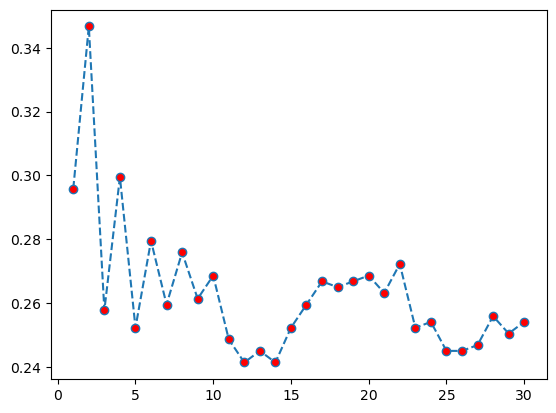

In [158]:
# finding the K value
error = []

for i in range(1,31,1):
    knn =  KNeighborsClassifier(n_neighbors=i)
    knn.fit(Xtrain,ytrain)
    preds = knn.predict(Xtest.values)
    error.append(np.mean(preds!=ytest))

plt.plot(range(1,31,1), error, linestyle = 'dashed', marker ='o', mfc= 'red')
plt.show()

In [159]:
#Fit the training sets to the model.

knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(Xtrain, ytrain)

KNeighborsClassifier(n_neighbors=2)

In [160]:
#knn_model = knn.predict(Xtest) 
print(f"Accuracy : {accuracy_score(ytest, knn.predict(Xtest.values))*100} %" )

C:\Users\acer\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Accuracy : 65.33575317604355 %


##### Predicting the test results and train result

In [161]:
knn_model = knn.predict(Xtest.values)
knn_modeltrain = knn.predict(Xtrain.values)
#knn.score(scaled_Xtest, ytest)
#accuracy_score(ytest, knn_model)
print(f"Test Accuracy : {accuracy_score(ytest, knn_model)*100} %" )
print(f"Train Accuracy : {accuracy_score(ytrain, knn_modeltrain)*100} %" )

C:\Users\acer\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Test Accuracy : 65.33575317604355 %
Train Accuracy : 83.46552776082977 %


#### 3. Naive Bayes
Naive Bayes is a simple "probabilistic classifiers" which based on applying Bayes' theorem with strong (naïve) independence assumptions between the features (X) and it is useful for very large dataset. In this section, GaussionNB was imported from sklearn and Xtrain, ytrain were bring fitted into the model in order to do prediction.

In [162]:
from sklearn.naive_bayes import GaussianNB       # 1. choose model class
naive_model = GaussianNB()                     # 2. instantiate model

Fit the training sets to the model.

In [163]:
naive_model.fit(Xtrain, ytrain)                  # 3. fit model to data

GaussianNB()

##### Predict testing test and testing train

In [164]:
y_naive_model_model = naive_model.predict(Xtest)
y_naive_model_model_train = naive_model.predict(Xtrain)

In [165]:
from sklearn.metrics import accuracy_score
#accuracy_score(ytest, y_naive_model_model)
print(f"Test Accuracy : {accuracy_score(ytest, y_naive_model_model)*100} %" )
print(f"Train Accuracy : {accuracy_score(ytrain, y_naive_model_model_train)*100} %" )

Test Accuracy : 75.31760435571688 %
Train Accuracy : 79.86577181208054 %


#### 4. Support Vector Machine (SVM)

A linear SVM was chosen by using the SVC classifier to make prediction on Xtest dataset by fitting the Xtrain and ytrain datasets into the SVM model. Accuracy was calculated and displyed by using score syntax.


In [166]:
# Import necessary library

# Create a linear SVM classifier
svm_model = SVC()

# Train classfier
svm_model.fit(Xtrain, ytrain)

# Take the model that was trained on the Xtrain data and apply it to the Xtest
y_pred_svm = svm_model.predict(Xtest)

# Calculation of accuracy Data Test
svmScore = svm_model.score(Xtest, ytest)
svmScoreTrain = svm_model.score(Xtrain,ytrain)

# Calculation of confusion matrix
svmMatrix = confusion_matrix(ytest, y_pred_svm)

# Print output
print(f"Test Accuracy : {svmScore*100} %")
print(f"Train Accuracy : {svmScoreTrain*100} %")

Test Accuracy : 72.0508166969147 %
Train Accuracy : 74.92373398413666 %


## E. Evaluation Model
The evaluation mathod used involving confusion metrix, precision-recall curve and also learning curve.
1. Learning Curve
2. Model Evaluation
3. Precision Recall Curve

In [167]:
# Gabungkan data Xtrain dan Xtest sebelum melakukan learning curve
X = pd.concat([Xtrain, Xtest], axis=0)

# Gabungkan data ytrain dan ytest sebelum melakukan learning curve
y = pd.concat([ytrain, ytest], axis=0)

In [168]:
X

,balance,duration,pdays,age,job,marital,education,default,housing,loan,contact,day,month,campaign,previous,poutcome
0,1.402886,-0.156592,-0.945637,46,0,1,3,0,0,0,0,3,9,1,8,2
1,-0.792636,-0.491725,-0.972817,25,9,2,2,0,0,1,0,11,1,1,1,2
2,-0.508756,0.086091,0.929745,28,0,0,2,0,1,0,0,13,5,1,1,2
3,-0.496927,-0.457056,-0.972817,29,0,2,2,0,0,0,0,9,11,2,3,2
4,0.415675,-1.005981,1.210599,34,0,1,2,0,1,0,0,17,4,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,-0.853597,-0.942422,1.355557,42,4,1,3,0,1,0,0,20,4,2,3,0
547,72.966161,0.594569,-0.945637,84,5,1,2,0,0,0,1,1,4,1,3,2
548,1.953359,0.542565,1.192480,43,6,1,3,0,0,0,0,21,4,2,17,1
549,-0.785357,-0.717073,-0.963757,31,4,2,3,0,0,0,0,9,6,2,3,2


In [169]:
y

2632    1
3056    1
1928    1
4095    1
7242    0
       ..
9860    0
3380    1
8733    0
3598    1
1959    1
Name: deposit, Length: 2190, dtype: int64

### 1. Learning Curve

#### Function Learning Curve

In [170]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np


def plot_learning_curve_classification(model, X, y, cv, scoring, title):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=cv, scoring=scoring)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Number of Training Samples")
    plt.ylabel(scoring)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training " + scoring)
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Testing " + scoring)

    plt.legend(loc="best")
    plt.show()

#### Learning Curves : Logistic Regression

C:\Users\acer\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\acer\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

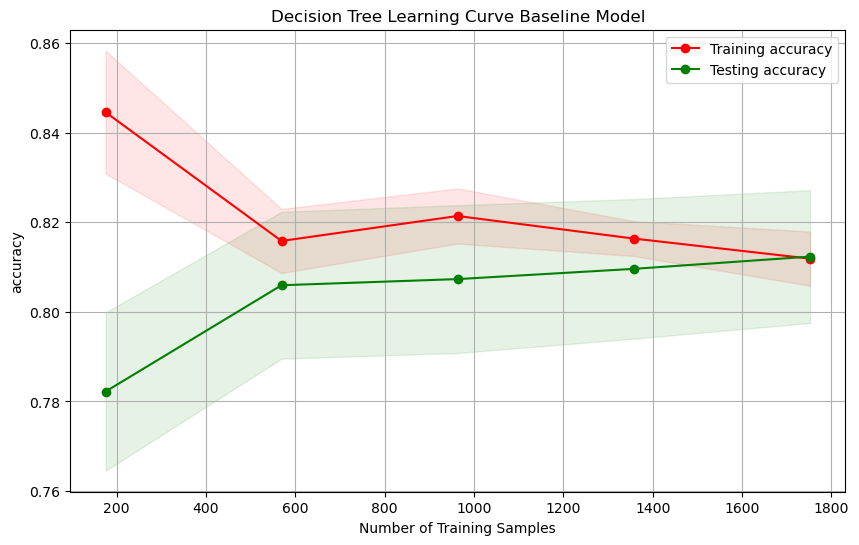

In [171]:
plot_learning_curve_classification(logistic_regression, X, y, cv=5, scoring='accuracy', title="Decision Tree Learning Curve Baseline Model")

#### Learning Curves : KNN

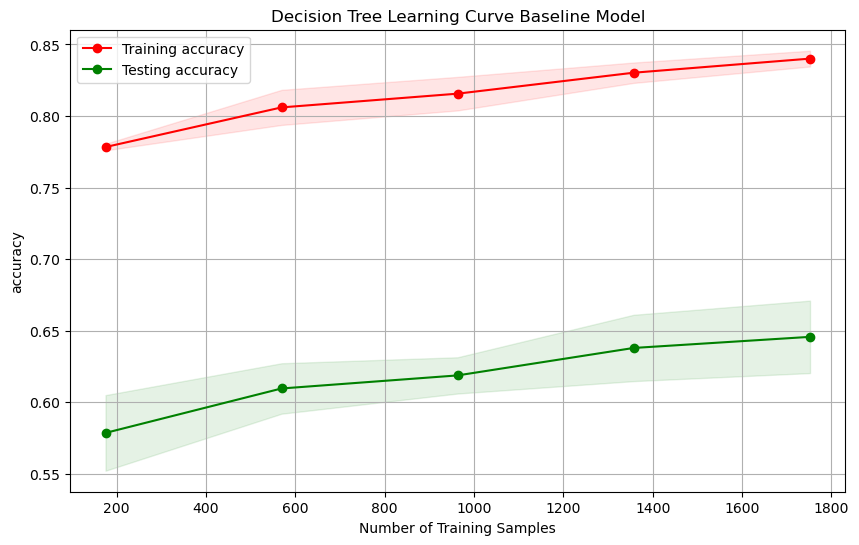

In [172]:
plot_learning_curve_classification(knn, X.values, y.values, cv=5, scoring='accuracy', title="Decision Tree Learning Curve Baseline Model")

#### Learning Curves : Naive Bayes

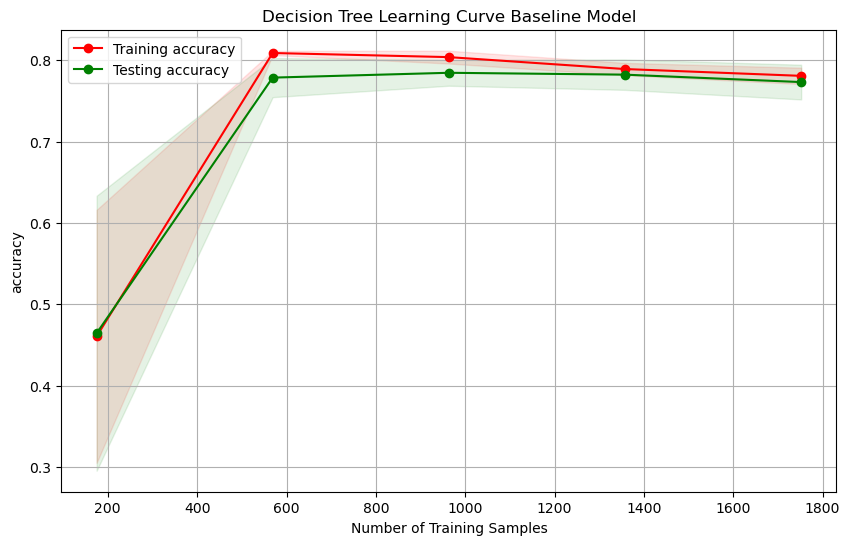

In [173]:
plot_learning_curve_classification(naive_model, X, y, cv=5, scoring='accuracy', title="Decision Tree Learning Curve Baseline Model")

#### Learning Curves : SVM

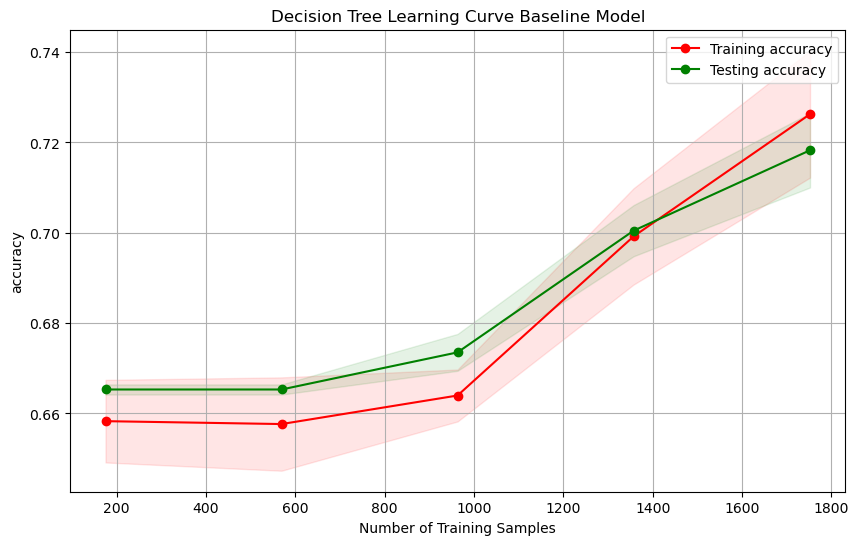

In [174]:
plot_learning_curve_classification(svm_model, X, y, cv=5, scoring='accuracy', title="Decision Tree Learning Curve Baseline Model")

### 2. Model Evaluation

#### Model Evaluation Function

In [175]:
def model_evaluation(model,name):
    
    confusion_matrix = pd.crosstab(ytest, model, rownames=['Actual'], colnames=['Predicted'], margins = True)
    sns.heatmap(confusion_matrix, square=True, annot=True, fmt='d', cbar=False)
    plt.xlabel('Prediction label')
    plt.ylabel('True Label');
    plt.title(name)
    plt.yticks([0.5,1.5], [ 'NO', 'YES'],va='center')
    plt.xticks([0.5,1.5], [ 'NO', 'YES'],va='center')
    plt.show()

    target_names = ['No' , 'Yes']
    print ('Accuracy:', accuracy_score(ytest, model))
    print ('Precision:', precision_score(ytest, model,pos_label=1))
    print ('F1 score:', f1_score(ytest, model,pos_label=1))
    print ('Recall:', recall_score(ytest, model,pos_label=1))
    print ('\n clasification report:\n', classification_report(ytest,model,target_names=target_names))

In [176]:
def evaluate(model, x_test = Xtest, y_test = ytest, x_train=Xtrain, y_train=ytrain):
    y_pred_train = model.predict(x_train)
    print('======= Data Train =======')
    print('------')
    print('Confusion Matrix Data Train:')
    print()
    print(classification_report(y_train, y_pred_train))
    print('------')
    
    tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train).ravel()
    print('Assuming 1 as positive, we get for Data Train:')
    print('')
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('False Positive:', fp)
    print('False Negative:', fn)
    
    print('')
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    print('Accuracy Data Train:', accuracy_score(y_train, y_pred_train))
    print('Precision Data Train:', precision)
    print('Recall Data Train:', recall)
    print('F1-Score Data Train:', 2 * (precision * recall)/(precision + recall))
    
    y_pred = model.predict(x_test)
    print('======= Data Test =======')
    print('------')
    print('Confusion Matrix:')
    print()
    print(classification_report(y_test, y_pred))
    print('------')
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print('Assuming 1 as positive, we get:')
    print('')
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('False Positive:', fp)
    print('False Negative:', fn)
    
    print('')
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    print('Accuracy Data Test:', accuracy_score(y_test, y_pred))    
    print('Precision Data Test:', precision)
    print('Recall Data Test:', recall)
    print('F1-Score Data Test:', 2 * (precision * recall)/(precision + recall))

#### Logistic Regression

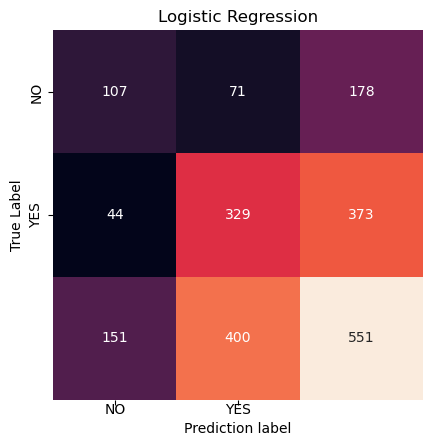

Accuracy: 0.7912885662431942
Precision: 0.8225
F1 score: 0.851228978007762
Recall: 0.8820375335120644

 clasification report:
               precision    recall  f1-score   support

          No       0.71      0.60      0.65       178
         Yes       0.82      0.88      0.85       373

    accuracy                           0.79       551
   macro avg       0.77      0.74      0.75       551
weighted avg       0.79      0.79      0.79       551



In [177]:
lr_y_pred = logistic_regression.predict(Xtest)
model_evaluation(lr_y_pred,"Logistic Regression")

In [178]:
evaluate(logistic_regression, x_test = Xtest, y_test = ytest, x_train=Xtrain, y_train=ytrain)

======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.77      0.68      0.72       555
           1       0.85      0.89      0.87      1084

    accuracy                           0.82      1639
   macro avg       0.81      0.79      0.80      1639
weighted avg       0.82      0.82      0.82      1639

------
Assuming 1 as positive, we get for Data Train:

True Positive: 970
True Negative: 378
False Positive: 177
False Negative: 114

Accuracy Data Train: 0.8224527150701647
Precision Data Train: 0.8456843940714909
Recall Data Train: 0.8948339483394834
F1-Score Data Train: 0.8695652173913044
======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.71      0.60      0.65       178
           1       0.82      0.88      0.85       373

    accuracy                           0.79       551
   macro avg       0.77      0.74      0.75   

#### KNN

C:\Users\acer\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


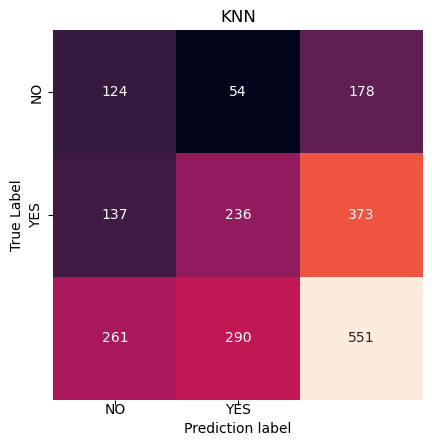

Accuracy: 0.6533575317604355
Precision: 0.8137931034482758
F1 score: 0.7119155354449472
Recall: 0.6327077747989276

 clasification report:
               precision    recall  f1-score   support

          No       0.48      0.70      0.56       178
         Yes       0.81      0.63      0.71       373

    accuracy                           0.65       551
   macro avg       0.64      0.66      0.64       551
weighted avg       0.70      0.65      0.66       551



In [179]:
knn_y_pred = knn.predict(Xtest.values)
model_evaluation(knn_y_pred,"KNN")

In [180]:
evaluate(knn, x_test = Xtest.values, y_test = ytest.values, x_train=Xtrain.values, y_train=ytrain.values)

C:\Users\acer\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.67      1.00      0.80       555
           1       1.00      0.75      0.86      1084

    accuracy                           0.83      1639
   macro avg       0.84      0.88      0.83      1639
weighted avg       0.89      0.83      0.84      1639

------
Assuming 1 as positive, we get for Data Train:

True Positive: 813
True Negative: 555
False Positive: 0
False Negative: 271

Accuracy Data Train: 0.8346552776082977
Precision Data Train: 1.0
Recall Data Train: 0.75
F1-Score Data Train: 0.8571428571428571
======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.48      0.70      0.56       178
           1       0.81      0.63      0.71       373

    accuracy                           0.65       551
   macro avg       0.64      0.66      0.64       551
weighted avg       0.70

C:\Users\acer\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


#### Naive Bayes

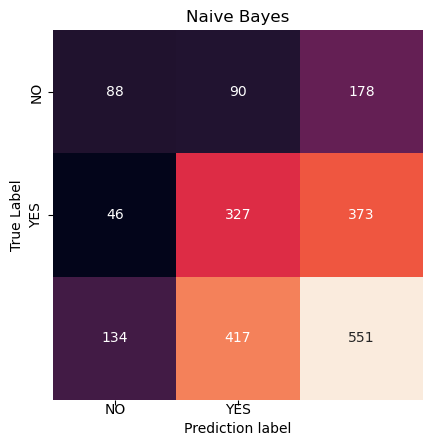

Accuracy: 0.7531760435571688
Precision: 0.7841726618705036
F1 score: 0.8278481012658229
Recall: 0.8766756032171582

 clasification report:
               precision    recall  f1-score   support

          No       0.66      0.49      0.56       178
         Yes       0.78      0.88      0.83       373

    accuracy                           0.75       551
   macro avg       0.72      0.69      0.70       551
weighted avg       0.74      0.75      0.74       551



In [181]:
nb_y_pred = naive_model.predict(Xtest)
model_evaluation(nb_y_pred,"Naive Bayes")

In [182]:
evaluate(naive_model, x_test = Xtest, y_test = ytest, x_train=Xtrain, y_train=ytrain)

======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.75      0.61      0.67       555
           1       0.82      0.89      0.85      1084

    accuracy                           0.80      1639
   macro avg       0.78      0.75      0.76      1639
weighted avg       0.79      0.80      0.79      1639

------
Assuming 1 as positive, we get for Data Train:

True Positive: 969
True Negative: 340
False Positive: 215
False Negative: 115

Accuracy Data Train: 0.7986577181208053
Precision Data Train: 0.8184121621621622
Recall Data Train: 0.8939114391143912
F1-Score Data Train: 0.8544973544973545
======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.66      0.49      0.56       178
           1       0.78      0.88      0.83       373

    accuracy                           0.75       551
   macro avg       0.72      0.69      0.70   

#### SVM

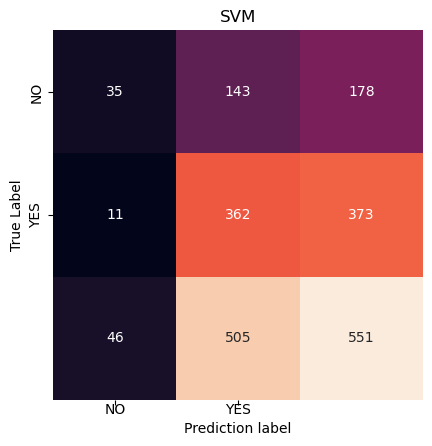

Accuracy: 0.720508166969147
Precision: 0.7168316831683168
F1 score: 0.8246013667425968
Recall: 0.9705093833780161

 clasification report:
               precision    recall  f1-score   support

          No       0.76      0.20      0.31       178
         Yes       0.72      0.97      0.82       373

    accuracy                           0.72       551
   macro avg       0.74      0.58      0.57       551
weighted avg       0.73      0.72      0.66       551



In [183]:
svm_y_pred = svm_model.predict(Xtest)
model_evaluation(svm_y_pred,"SVM")

In [184]:
evaluate(svm_model, x_test = Xtest, y_test = ytest, x_train=Xtrain, y_train=ytrain)

======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.90      0.29      0.44       555
           1       0.73      0.98      0.84      1084

    accuracy                           0.75      1639
   macro avg       0.82      0.64      0.64      1639
weighted avg       0.79      0.75      0.70      1639

------
Assuming 1 as positive, we get for Data Train:

True Positive: 1066
True Negative: 162
False Positive: 393
False Negative: 18

Accuracy Data Train: 0.7492373398413666
Precision Data Train: 0.7306374228923921
Recall Data Train: 0.9833948339483395
F1-Score Data Train: 0.8383798662996461
======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.76      0.20      0.31       178
           1       0.72      0.97      0.82       373

    accuracy                           0.72       551
   macro avg       0.74      0.58      0.57   

## Conclusion 

The 3 best baseline models are: Logistic Regression, SVM, Naive Bayes